# Notebook - Gridworld - ValueIteration - withFunctions

In this notebook we want to [???DA FARE]

What we call a "gridworld" is, essentially, a grid of `Lx` columns and `Ly` rows. At each iteration the agent will be in a cell of this grid; the actions that it is allowed to do are:
- move to the right cell
- move to the left cell
- move to the cell above
- move to the cell below

An amount of cells equal to `Nblocks` is seen as walls (meaning that the agent cannot stay in those cells, nor can jump over them). A list of `goals` contains the coordinates of the cells that the agent aims to reach. Each goal-cell is associated with a reward, a value stored in the list `rewards_list`: when the agent succeeds in occupying a goal-cell it will get the associated reward.

Reached one of the goal-cell, the episode is over ("the game is over", but in a nice way because the agent won): the agent will not continue to play, so it will not aim to another goal-cell.

## Libraries

First of all we need to import the libraries and the files that we will need to execute the code. `PY_GW_VI_plot` is the file containing the functions useful to visually plot some information regarding the specific gridworld. `PY_GW_VI_tools` contains the functions that will be used to get information, manipulate and act on the gridworld.

In [1]:
import numpy as np
import PY_GW_VI_plot
import PY_GW_VI_tools
import time

## Example 1: Solving a standard gridworld problem

In this first example the grid contains just one goal-cell: the aim of the agent is to reach that cell, obtaining the reward that it carries. Let's define the parameters that describe the environment of the grid:

In [2]:
# width of the grid; height of the grid; amount of cells that are walls in the grid
Lx = 10 
Ly = 15
Nblocks = 40

# cells that are goals; amount of the rewards if the goals are reached
goal = [(9,9)]
rewards_list = [1]

# possible actions that the agent can do (i.e., how it moves in the grid).
# Observe that the way they are defined will make easy the computation the new state
Actions = np.array([[1,0],[-1,0],[0,1],[0,-1]]) # respectively: right, left, up, down 

# the algorithm will stop after a certain amount of iterations max_n_of_iterations if it hadn't reached the
# desidered tolerance yet ( dist_2(V_(k+1) - V_(k)) < tolerance )
max_n_of_iterations = 300
tolerance = 0.001

# gamma is the discount factor, which expresses how far in the future we want your sum to contribute.
# The more gamma is high, the more forward-looking we are and take the future into account
gamma = 0.95

# probability that I take the action that maximises the V (V is the value of the policy).
# A value that is less than 1 means that with a probability 1 - p we will pick a random action (however,
# in the set of the random actions there is also the one that maximises the V)
p = 1

# random_flag=False means that the choice of the action is deterministic.
# Redundancy with p = 1, but the boolean value is safer to be used with comparisons (floats may give problems)
random_flag=False

Remark that we just set the amount `Nblocks` of the wall-cells, not their position in the grid.

Now that we have defined the parameters we can initialise the specific play ground that we call `World`, that is a concrete instance of a gridworld. The code will plot some visual images of the gridworld. A set of three images will display the gridworld:
- as it is
- with each cell containing its associated value of [???COSA, ESATTAMENTE?]
- with each cell containing the indication of the best action to choose at the following iteration

Our code will also print some information:
- whether we succeeded in having a value lower than `tolerance`
- at which iteration we got a value lower than `tolerance`

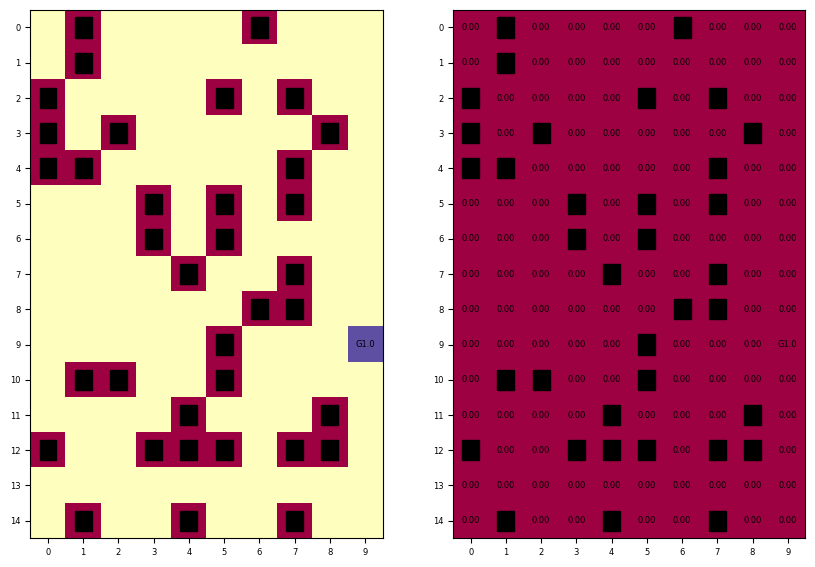

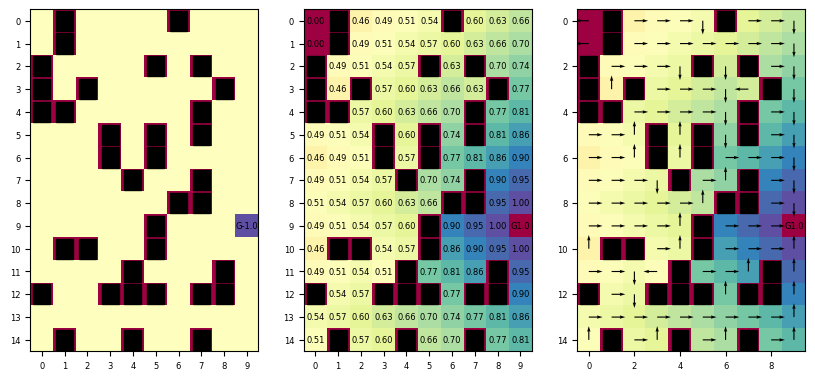

Yes, we converge w.r.t. our tolerance
Distance between V_16(S) and V_17(S) is: 0.0


In [3]:
# GRIDWORLD 1

# Build the world (and initial values)
World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
Values = np.zeros((Ly,Lx))

# Solve and plot
PY_GW_VI_plot.plot_world_values(World=World, Values=Values)
World, NewValues, Policy, result_info, num_iter = PY_GW_VI_tools.solve_grid_world(
    World = World,
    initial_values = Values,
    max_n_of_iterations = max_n_of_iterations,
    gamma = gamma,
    tolerance = tolerance,
    possible_actions = Actions,
    p = p,
    random_flag=random_flag)
PY_GW_VI_plot.plot_world_values_policy(World=World, Values=NewValues, Policy=Policy)
print( PY_GW_VI_tools.get_info_about_result(result_info = result_info) )

Due to how the functions are build, observe that the same code may give a different instance (the position of the `Nblocks` wall-cells may vary) is different:

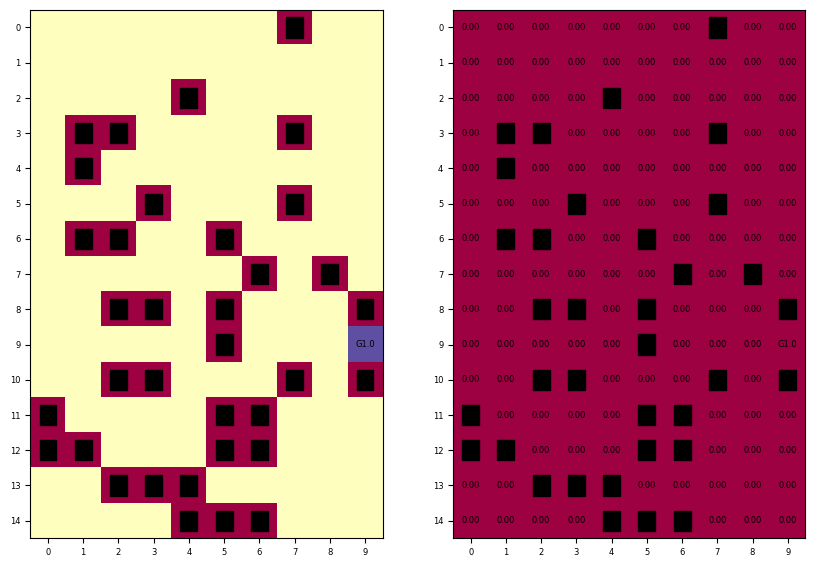

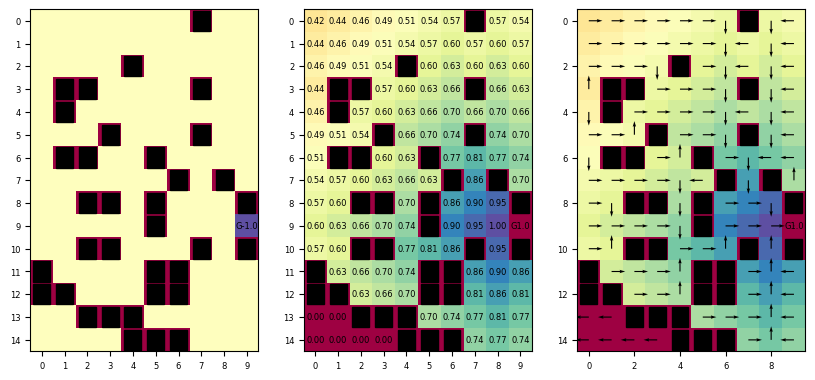

Yes, we converge w.r.t. our tolerance
Distance between V_18(S) and V_19(S) is: 0.0


In [4]:
# GRIDWORLD 2

# Build the world (and initial values)
World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
Values = np.zeros((Ly,Lx))

# Solve and plot
PY_GW_VI_plot.plot_world_values(World=World, Values=Values)
World, NewValues, Policy, result_info, num_iter = PY_GW_VI_tools.solve_grid_world(
    World = World,
    initial_values = Values,
    max_n_of_iterations = max_n_of_iterations,
    gamma = gamma,
    tolerance = tolerance,
    possible_actions = Actions,
    p = p,
    random_flag=random_flag)
PY_GW_VI_plot.plot_world_values_policy(World=World, Values=NewValues, Policy=Policy)
print( PY_GW_VI_tools.get_info_about_result(result_info = result_info) )

### Tests

Let's now play a little with the code. We will observe what happens changing the values of:
- `max_n_of_iterations` (1)
- `gamma` (2)

and we will investigate:
- an average time to fall below the tolerance (3)
- number of iterations to converge (4)

#### (1) Changing max_n_of_iterations

max_n_of_iterations =  2


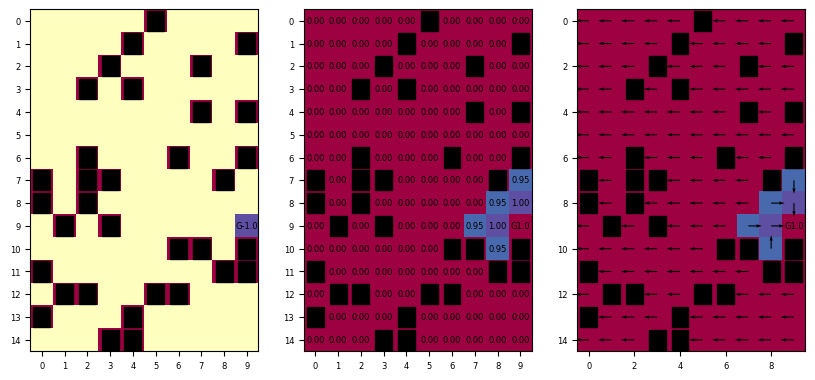

No, we stop before reaching the tolerance threshold
Distance between V_2(S) and V_3(S) is: 0.15513435037626794



max_n_of_iterations =  4


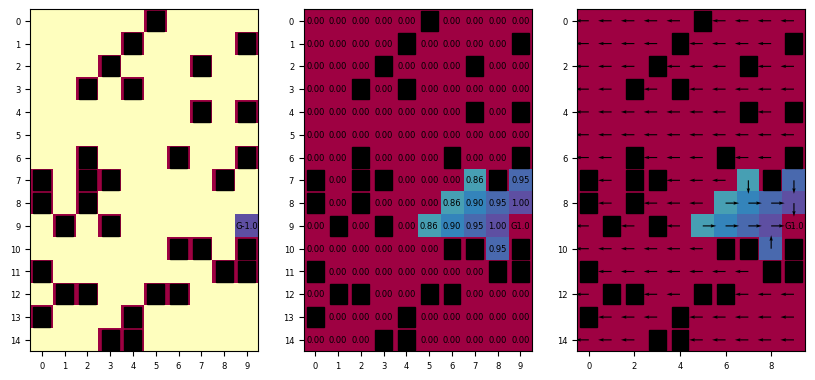

No, we stop before reaching the tolerance threshold
Distance between V_4(S) and V_5(S) is: 0.12125113530396323



max_n_of_iterations =  6


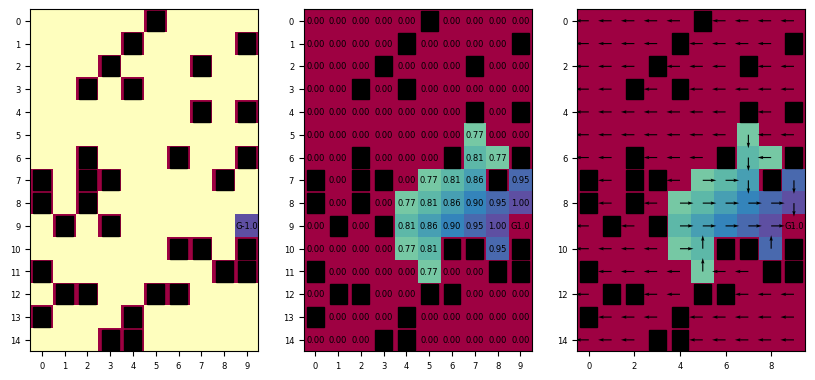

No, we stop before reaching the tolerance threshold
Distance between V_6(S) and V_7(S) is: 0.15475618749999998



max_n_of_iterations =  8


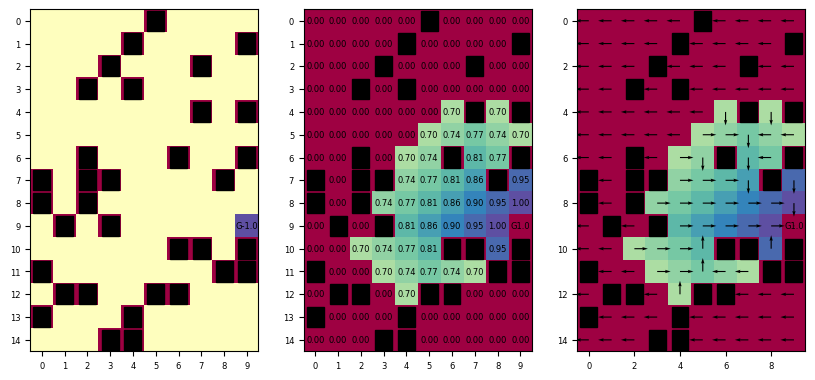

No, we stop before reaching the tolerance threshold
Distance between V_8(S) and V_9(S) is: 0.1710570043784579



max_n_of_iterations =  10


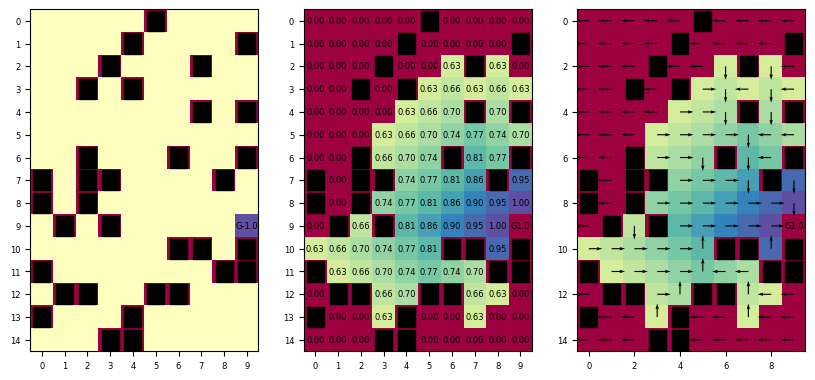

No, we stop before reaching the tolerance threshold
Distance between V_10(S) and V_11(S) is: 0.17826145258203593



max_n_of_iterations =  12


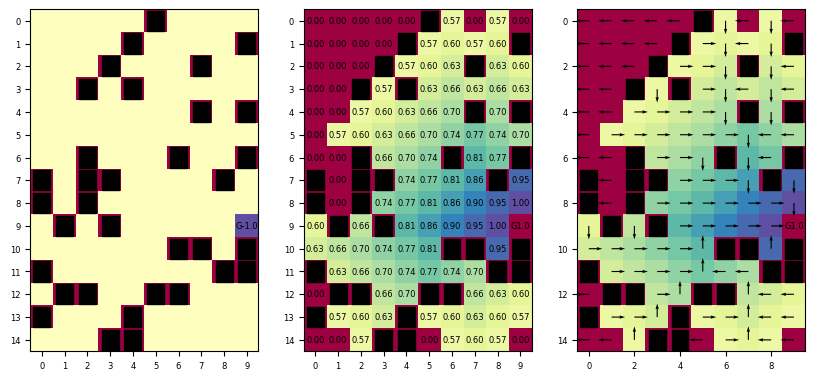

No, we stop before reaching the tolerance threshold
Distance between V_12(S) and V_13(S) is: 0.17377129854364948



max_n_of_iterations =  14


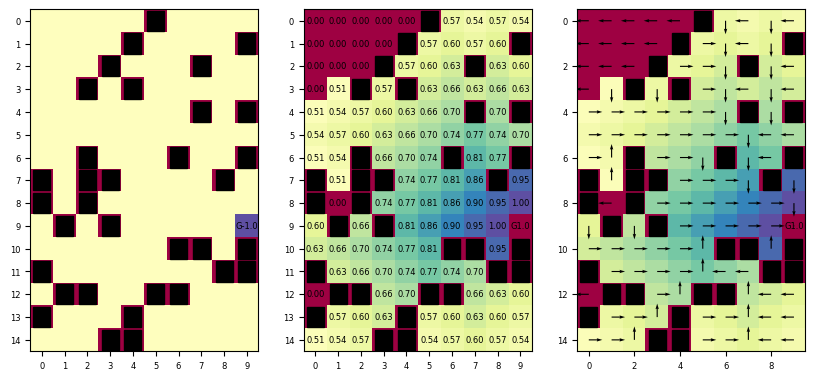

No, we stop before reaching the tolerance threshold
Distance between V_14(S) and V_15(S) is: 0.09372301290962676



max_n_of_iterations =  16


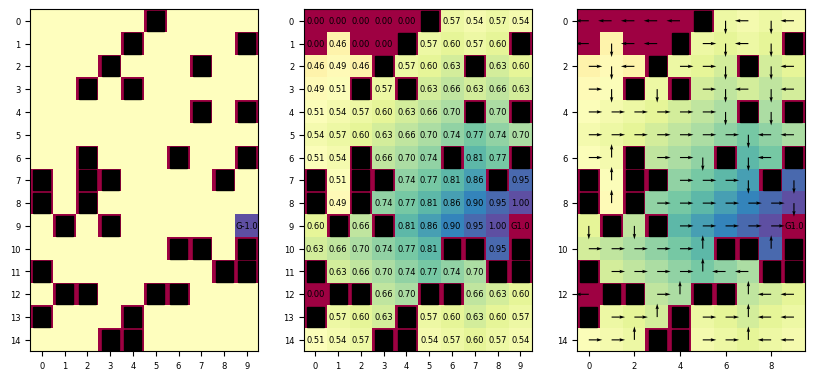

No, we stop before reaching the tolerance threshold
Distance between V_16(S) and V_17(S) is: 0.06551927410204376



max_n_of_iterations =  18


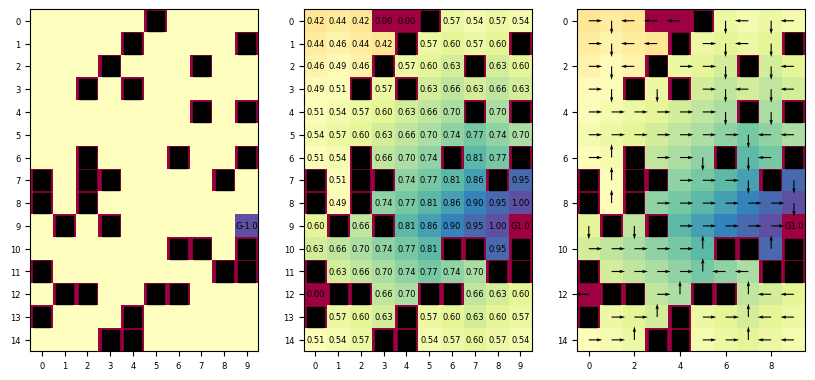

No, we stop before reaching the tolerance threshold
Distance between V_18(S) and V_19(S) is: 0.05913114487709449



max_n_of_iterations =  20


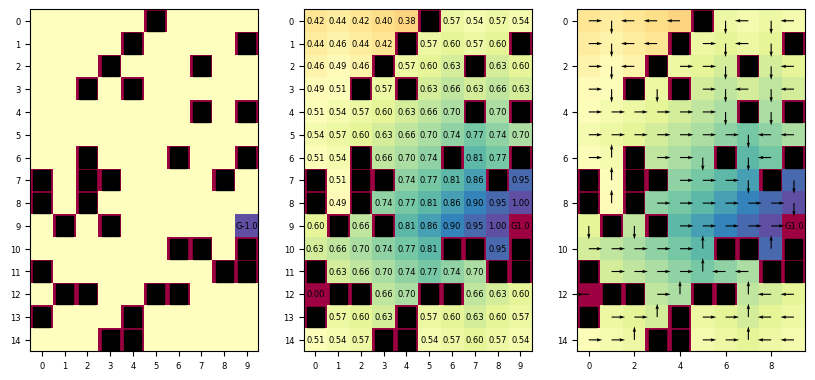

No, we stop before reaching the tolerance threshold
Distance between V_20(S) and V_21(S) is: 0.030810792627083836





In [5]:
# (1) Changing max_n_of_iterations: everything else, position of the Nblocks included, remains fixed


# Build the world (and initial values)
World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
Values = np.zeros((Ly,Lx))

iterations_for = 10

for n in range(1, iterations_for + 1):
    print("max_n_of_iterations = ", n*2)
    World, NewValues, Policy, result_info, num_iter = PY_GW_VI_tools.solve_grid_world(
        World = World,
        initial_values = Values,
        max_n_of_iterations = n*2,
        gamma = gamma,
        tolerance = tolerance,
        possible_actions = Actions,
        p = p,
        random_flag=random_flag)
    PY_GW_VI_plot.plot_world_values_policy(World=World, Values=NewValues, Policy=Policy)
    print(PY_GW_VI_tools.get_info_about_result(result_info = result_info))
    print("\n\n")

Observe that the more high the number of iteration, the more far from the goal-cell we have the optimal indications to reach the aim. Somehow, the indications propagates from the goal-cell to the rest of the grid.

#### (2) Changing gamma

gamma =  0.1


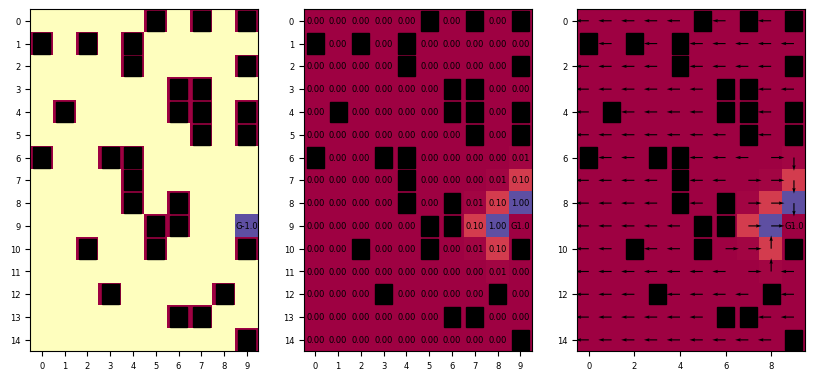

Yes, we converge w.r.t. our tolerance
Distance between V_3(S) and V_4(S) is: 0.0001825741858350554



gamma =  0.2


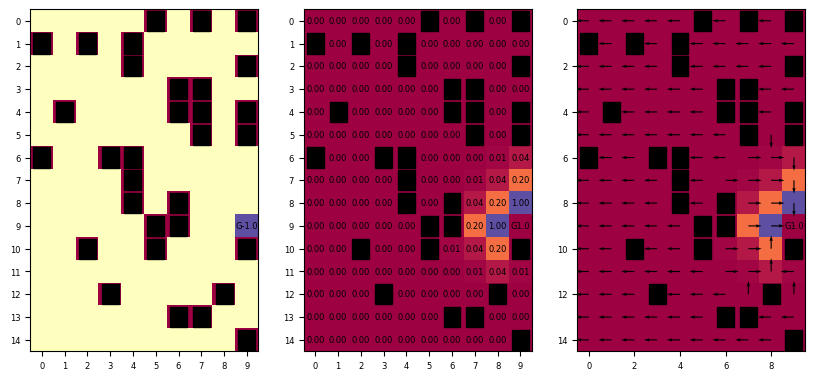

Yes, we converge w.r.t. our tolerance
Distance between V_4(S) and V_5(S) is: 0.0003200000000000001



gamma =  0.30000000000000004


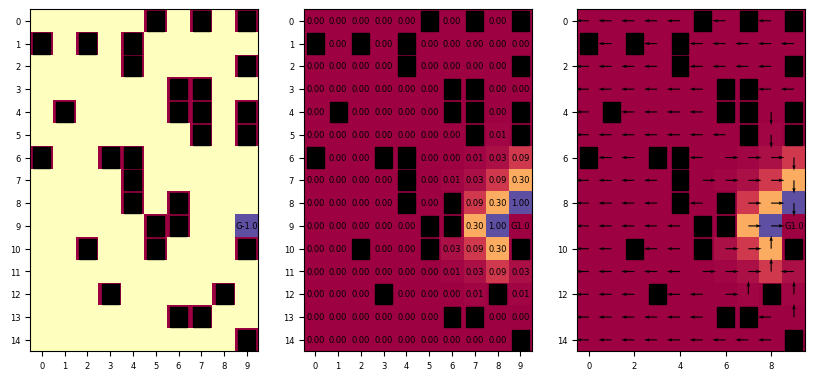

Yes, we converge w.r.t. our tolerance
Distance between V_5(S) and V_6(S) is: 0.0004860000000000003



gamma =  0.4


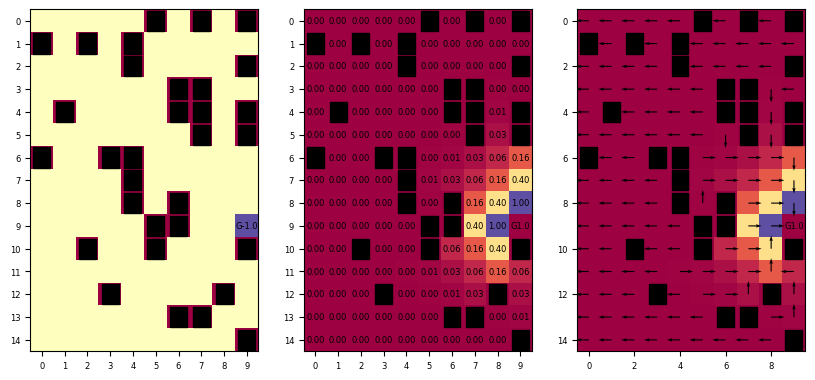

Yes, we converge w.r.t. our tolerance
Distance between V_6(S) and V_7(S) is: 0.0008848371300226202



gamma =  0.5


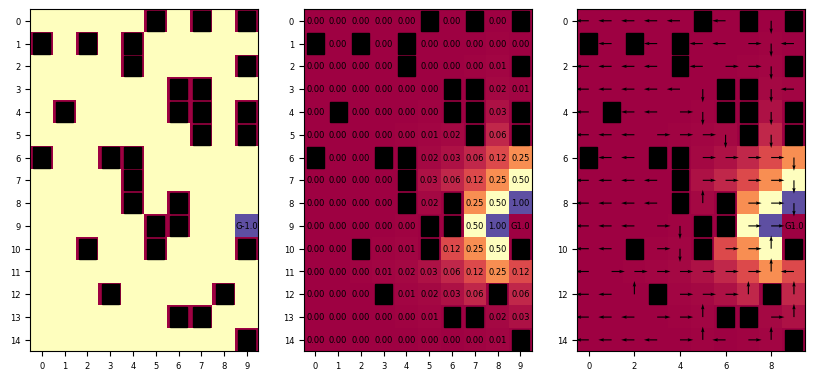

Yes, we converge w.r.t. our tolerance
Distance between V_9(S) and V_10(S) is: 0.0005749844314015526



gamma =  0.6000000000000001


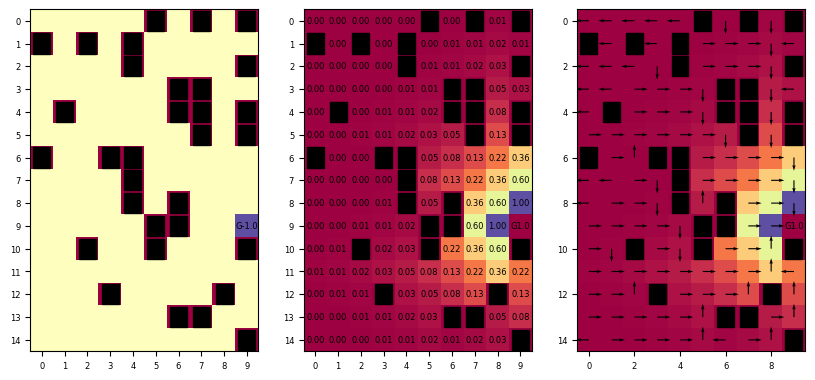

Yes, we converge w.r.t. our tolerance
Distance between V_12(S) and V_13(S) is: 0.0005332006004303615



gamma =  0.7000000000000001


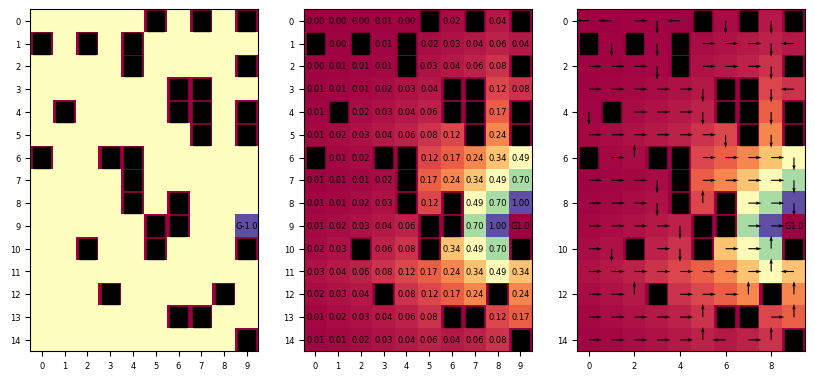

Yes, we converge w.r.t. our tolerance
Distance between V_15(S) and V_16(S) is: 0.0007752735481225074



gamma =  0.8


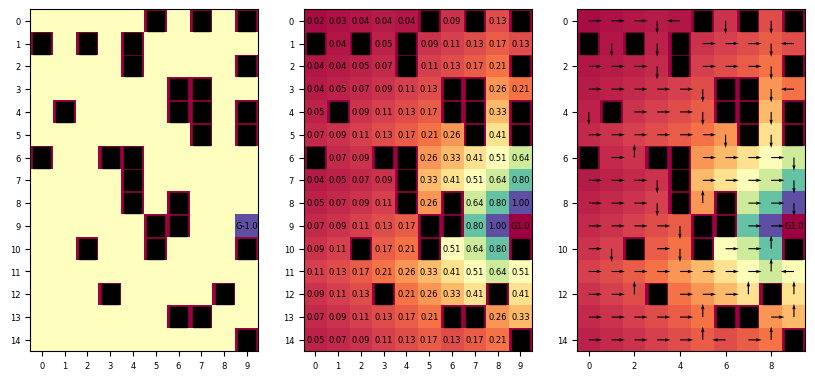

Yes, we converge w.r.t. our tolerance
Distance between V_18(S) and V_19(S) is: 0.0



gamma =  0.9


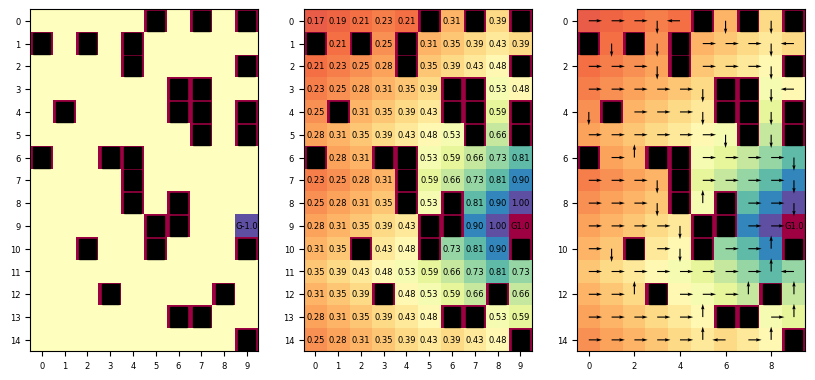

Yes, we converge w.r.t. our tolerance
Distance between V_18(S) and V_19(S) is: 0.0



gamma =  1.0


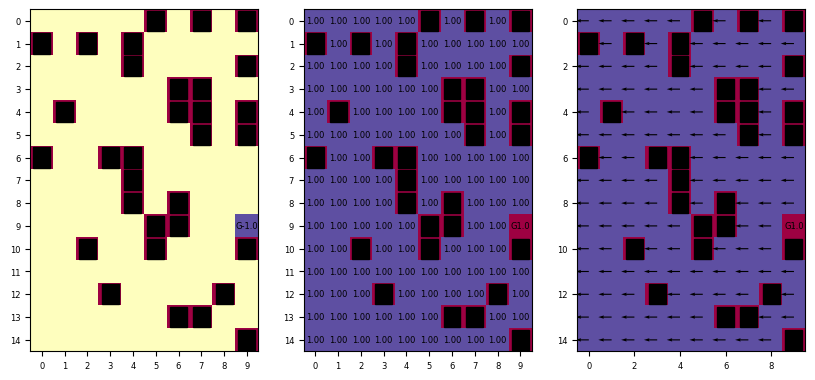

Yes, we converge w.r.t. our tolerance
Distance between V_18(S) and V_19(S) is: 0.0





In [6]:
# (2) Changing gamma: everything else, position of the Nblocks included, remains fixed


# Build the world (and initial values)
World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
Values = np.zeros((Ly,Lx))

iterations_for = 10
max_n_of_iterations = 300

for n in range(1, iterations_for + 1):
    print("gamma = ", 0.1*n)
    World, NewValues, Policy, result_info, num_iter = PY_GW_VI_tools.solve_grid_world(
        World = World,
        initial_values = Values,
        max_n_of_iterations = max_n_of_iterations,
        gamma = 0.1*n,
        tolerance = tolerance,
        possible_actions = Actions,
        p = p,
        random_flag=random_flag)
    PY_GW_VI_plot.plot_world_values_policy(World=World, Values=NewValues, Policy=Policy)
    print(PY_GW_VI_tools.get_info_about_result(result_info = result_info))
    print("\n\n")

Here we observe that the less the value of gamma, the less the amount of iterations needed for convergence but, on the other hand, somehow to a worse result. As a matter of fact, starting from some cells we will not be able to reach the goal-cell following the provided indications or the path will not be optimised.

The more the value of gamma (except for `gamma = 1` ) the more high the time for convergence but the more optimised the result on the grid. [???AGGIUNGERE]

#### (3) An average time to fall below the tolerance

The generation of the gridworld is partially random since the amount `Nblock` is fixed but the positions of the walls is not. Here we will investigate an average of the time to reach the convergence if `Lx` and `Ly` change (the time required to do the plots will not be considered). The value of `max_n_of_iterations` is important to set a stop condition to the algorithm: we assume that the value we chose is high enough and that the convergence happens before. However, this is not sure and one may play with the variable and the code to see how many times the convergences is reached and how many times it is not. A high value of `num_tests` helps to obtain a better estimation.

In [9]:
# (3) An average time to fall below the tolerance

def function_time(max_n_of_iterations, num_tests, Lx, Ly):

    times = []

    for i in range(1, num_tests + 1):

        start_time = time.time()

        # Build the world (and initial values)
        World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
        Values = np.zeros((Ly,Lx))

        # Solve and plot
        World, NewValues, Policy, result_info, num_iter = PY_GW_VI_tools.solve_grid_world(
            World = World,
            initial_values = Values,
            max_n_of_iterations = max_n_of_iterations,
            gamma = gamma,
            tolerance = tolerance,
            possible_actions = Actions,
            p = p,
            random_flag=random_flag)
    
        end_time = time.time()
        times.append(end_time - start_time)

    average_time = sum(times) / num_tests
    std_deviation = np.std(times)
    print(f"Lx = {Lx}; Ly = {Ly}")
    print(f"max_n_of_iterations = {max_n_of_iterations}; {num_tests} tests")
    print(f"Average time: {average_time} seconds")
    print(f"Standard deviation: {std_deviation} seconds")

function_time(1000, 50, 10, 15)
print("\n")
function_time(1000, 50, 15, 15)
print("\n")
function_time(1000, 50, 20, 20)
print("\n")
function_time(1000, 50, 25, 25)
print("\n")

Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 0.06300686359405518 seconds
Standard deviation: 0.01542664364793759 seconds


Lx = 15; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 0.09951008796691894 seconds
Standard deviation: 0.011782363605426178 seconds


Lx = 20; Ly = 20
max_n_of_iterations = 1000; 50 tests
Average time: 0.21298136234283446 seconds
Standard deviation: 0.01386507703599468 seconds


Lx = 25; Ly = 25
max_n_of_iterations = 1000; 50 tests
Average time: 0.6175137519836426 seconds
Standard deviation: 0.06482537928415202 seconds




#### (4) Number of iterations to converge

Let's study the average amount of iterations needed to get the convergence (so to fall below the requested tolerance). Similarly to the case before, we assume to have a value of `max_n_of_iterations` that is high enough and will not be reached:

In [12]:
# (4) Number of iterations to converge

def function_convergence(max_n_of_iterations, num_tests, Lx, Ly):

    iterations_convergence = []

    for i in range(1, num_tests + 1):

        # Build the world (and initial values)
        World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
        Values = np.zeros((Ly,Lx))

        # Solve
        World, NewValues, Policy, result_info, num_iter = PY_GW_VI_tools.solve_grid_world(
            World = World,
            initial_values = Values,
            max_n_of_iterations = max_n_of_iterations,
            gamma = gamma,
            tolerance = tolerance,
            possible_actions = Actions,
            p = p,
            random_flag=random_flag)
        
        iterations_convergence.append(num_iter)

    average_iter = sum(iterations_convergence) / num_tests
    std_deviation = np.std(iterations_convergence)
    print(f"Lx = {Lx}; Ly = {Ly}")
    print(f"max_n_of_iterations = {max_n_of_iterations}; {num_tests} tests")
    print(f"Average amount of iterations: {average_iter}")
    print(f"Standard deviation: {std_deviation}")

function_convergence(1000, 50, 10, 15)
print("\n")
function_convergence(1000, 50, 15, 15)
print("\n")
function_convergence(1000, 50, 20, 20)
print("\n")
function_convergence(1000, 50, 25, 25)
print("\n")

Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 19.5
Standard deviation: 5.386093203798093


Lx = 15; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 19.34
Standard deviation: 0.8856635930193811


Lx = 20; Ly = 20
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 20.94
Standard deviation: 0.42


Lx = 25; Ly = 25
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 31.02
Standard deviation: 0.13999999999999999




## Example 2: Solving a gridworld problem with multi goals

In this second example the grid contains more than one goal-cell: the aim of the agent is to reach one of those cell, obtaining the reward that it carries. Remeber that the game is over when the agent succeeds in reaching a goal-cell. Depending on some factors (included the position of the agent) the target goal-cell will be different. 

Let's first define, again, the parameters that describe the environment of the grid:

In [16]:
# width of the grid; height of the grid; amount of cells that are walls in the grid
Lx = 10
Ly = 15
Nblocks = 45

# cells that are goals; amount of the rewards if the goals are reached.
# Remark that here we have two goals, and the rewards_list is therefore composed by two values
goal = [(13,8),(3,2)]
rewards_list = [10,1]

# the algorithm will stop after a certain amount of iterations max_n_of_iterations if it hadn't reached the
# desidered tolerance yet ( dist_2(V_(k+1) - V_(k)) < tolerance )
max_n_of_iterations = 300
tolerance = 0.001

# gamma is the discount factor, which expresses how far in the future we want your sum to contribute.
# The more gamma is high, the more forward-looking we are and take the future into account
gamma = 0.95 # try with gamma=0.5 ;)

# probability that I take the action that maximises the V (V is the value of the policy).
# A value that is less than 1 means that with a probability 1 - p we will pick a random action (however,
# in the set of the random actions there is also the one that maximises the V)
p = 1

# random_flag=False means that the choice of the action is deterministic.
# Redundancy with p = 1, but the boolean value is safer to be used with comparisons (floats may give problems)
random_flag=False

Now we can create an instance of a gridworld:

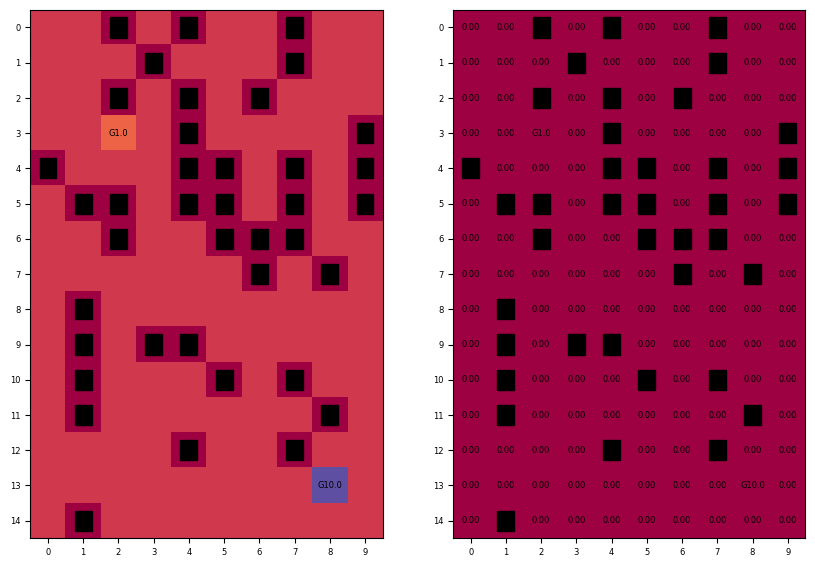

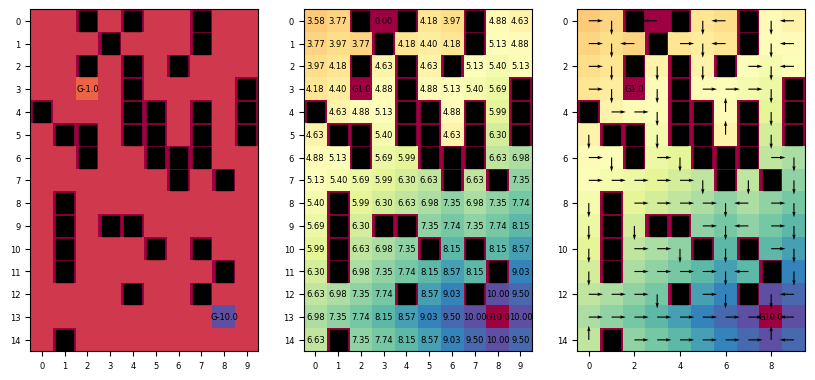

Yes, we converge w.r.t. our tolerance
Distance between V_21(S) and V_22(S) is: 0.0


In [18]:
# Build the world (and initial values)
World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
Values = np.zeros((Ly,Lx))

# Solve and plot
PY_GW_VI_plot.plot_world_values(World=World, Values=Values)
World, NewValues, Policy, result_info, num_iter = PY_GW_VI_tools.solve_grid_world(
    World = World,
    initial_values = Values,
    max_n_of_iterations = max_n_of_iterations,
    gamma = gamma,
    tolerance = tolerance,
    possible_actions = Actions,
    p = p,
    random_flag=random_flag)
PY_GW_VI_plot.plot_world_values_policy(World=World, Values=NewValues, Policy=Policy)
print( PY_GW_VI_tools.get_info_about_result(result_info = result_info) )

We can clearly see that two goal-cells have been generated and each on is associated to a certain reward. Observe that, if not forced by some wall-cells, the agent will aim to the goal-cells that carries the higher reward.

We will investigate more in detail the situation in the next paragraph.

#### Tests - 2 goal-cells

Let's now play a little with the code. We will observe what happens changing the values of:
- `max_n_of_iterations` (1)
- `gamma` (2)

and we will investigate:
- an average time to fall below the tolerance (3)
- number of iterations to converge (4)

having 2 goal-cells.

#### (1) Changing max_n_of_iterations

max_n_of_iterations =  2


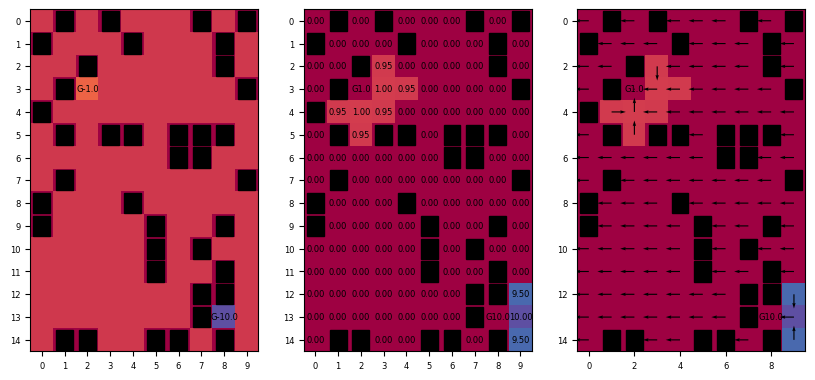

No, we stop before reaching the tolerance threshold
Distance between V_2(S) and V_3(S) is: 1.1105929347275114



max_n_of_iterations =  4


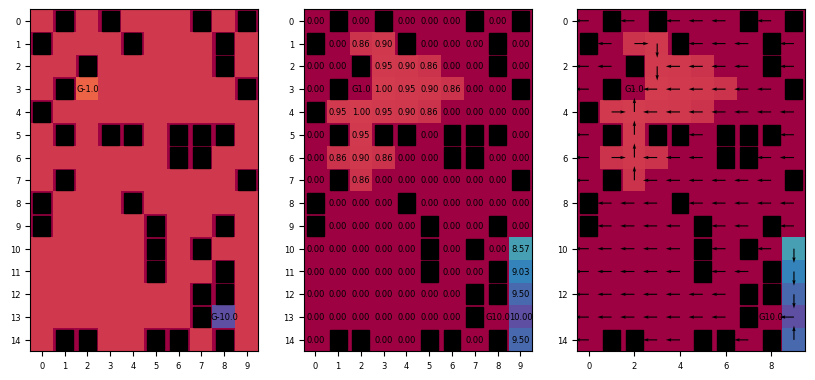

No, we stop before reaching the tolerance threshold
Distance between V_4(S) and V_5(S) is: 0.7241308919289615



max_n_of_iterations =  6


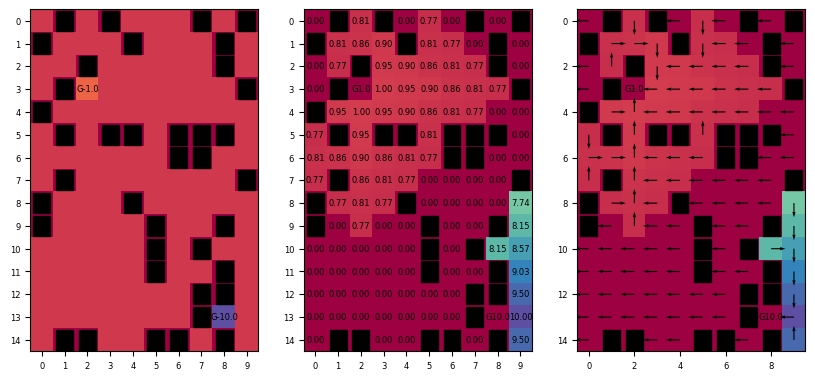

No, we stop before reaching the tolerance threshold
Distance between V_6(S) and V_7(S) is: 0.6716014400120397



max_n_of_iterations =  8


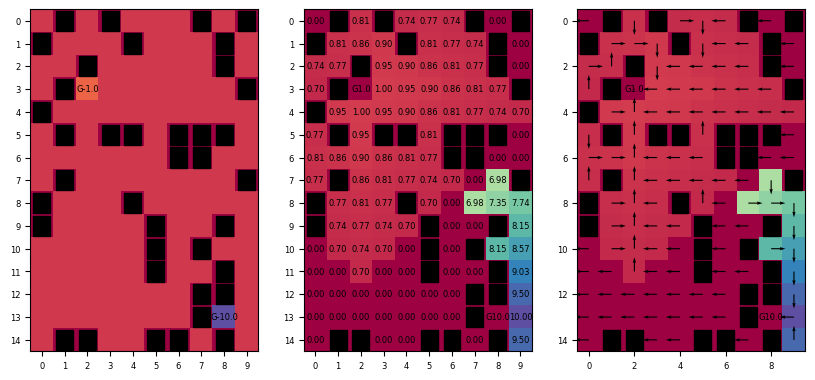

No, we stop before reaching the tolerance threshold
Distance between V_8(S) and V_9(S) is: 0.8223397337517311



max_n_of_iterations =  10


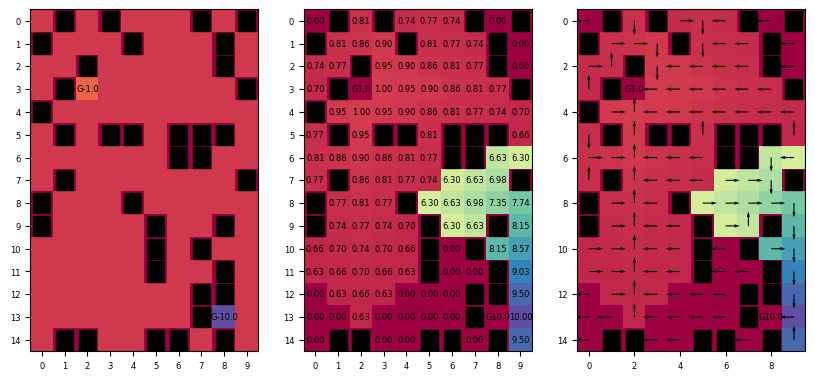

No, we stop before reaching the tolerance threshold
Distance between V_10(S) and V_11(S) is: 0.9806191315957448



max_n_of_iterations =  12


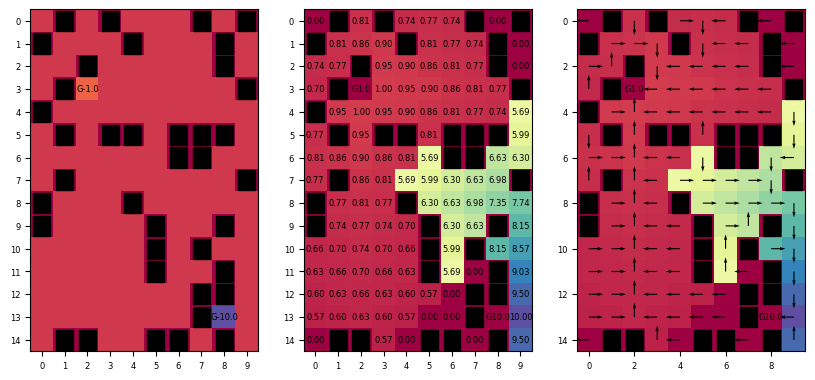

No, we stop before reaching the tolerance threshold
Distance between V_12(S) and V_13(S) is: 0.8439721476910471



max_n_of_iterations =  14


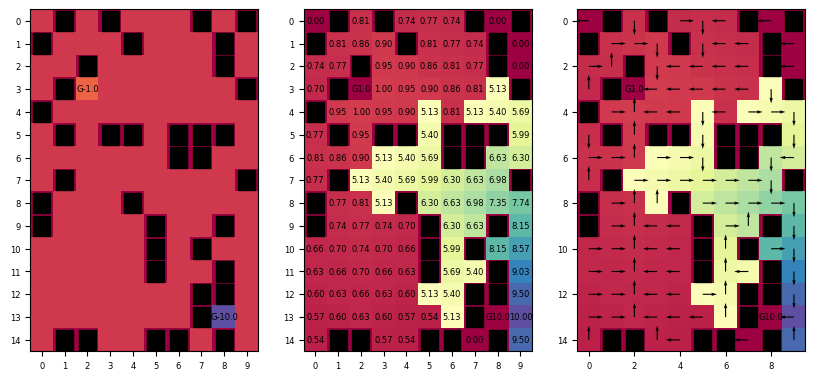

No, we stop before reaching the tolerance threshold
Distance between V_14(S) and V_15(S) is: 1.029760023480497



max_n_of_iterations =  16


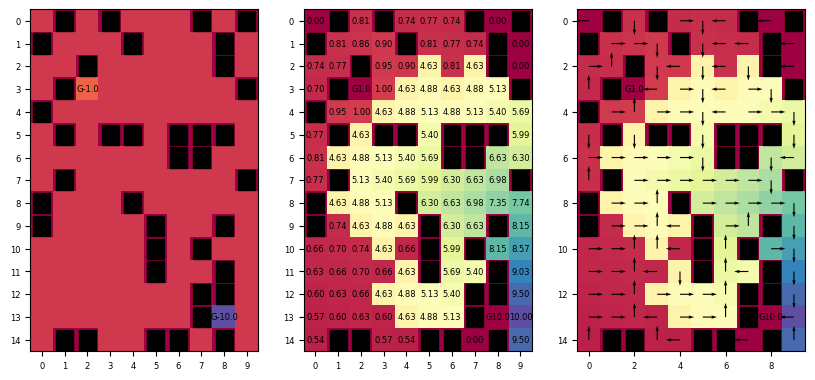

No, we stop before reaching the tolerance threshold
Distance between V_16(S) and V_17(S) is: 1.17659295968458



max_n_of_iterations =  18


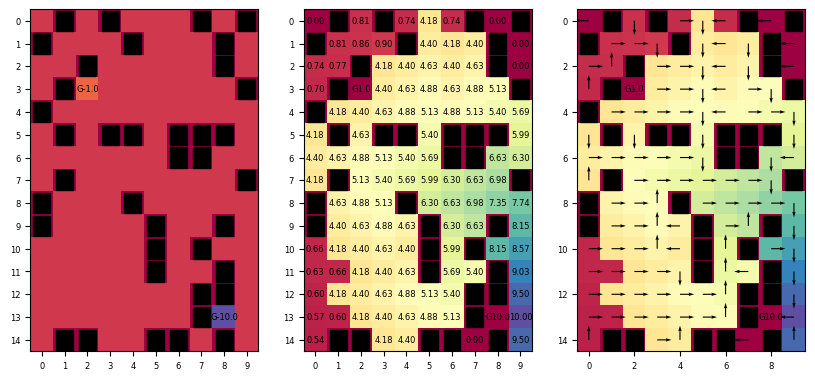

No, we stop before reaching the tolerance threshold
Distance between V_18(S) and V_19(S) is: 0.9304198955301087



max_n_of_iterations =  20


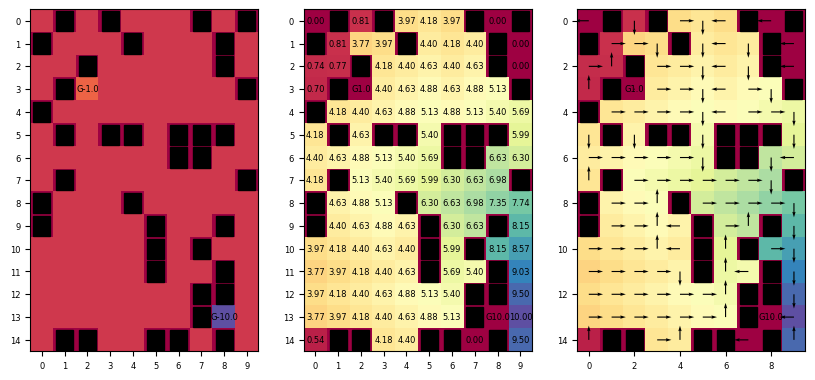

No, we stop before reaching the tolerance threshold
Distance between V_20(S) and V_21(S) is: 0.43707038544174825



max_n_of_iterations =  22


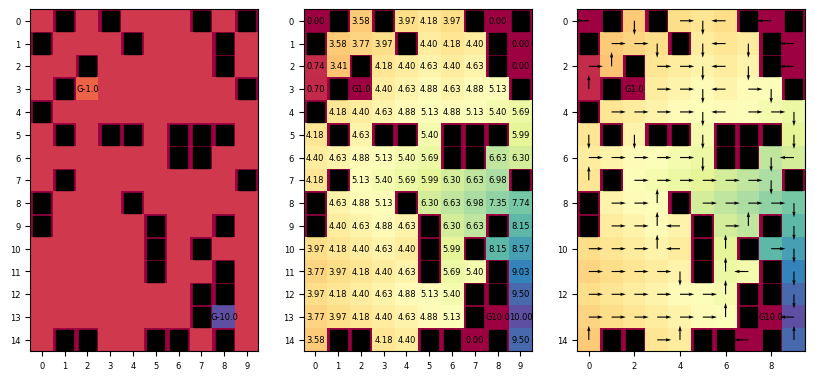

No, we stop before reaching the tolerance threshold
Distance between V_22(S) and V_23(S) is: 0.21488845447385166



max_n_of_iterations =  24


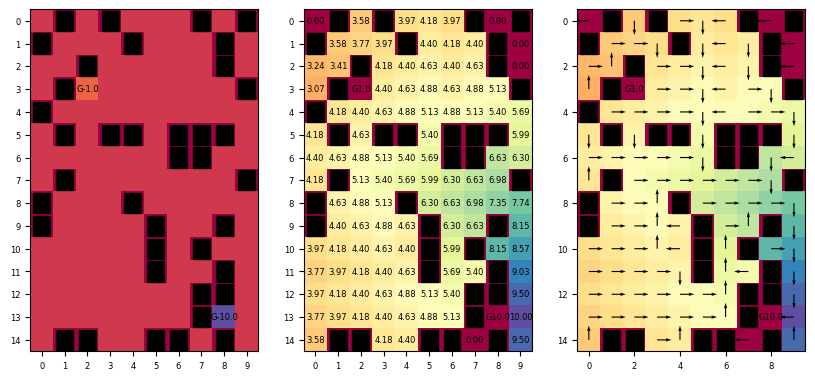

No, we stop before reaching the tolerance threshold
Distance between V_24(S) and V_25(S) is: 0.19393683016265115



max_n_of_iterations =  26


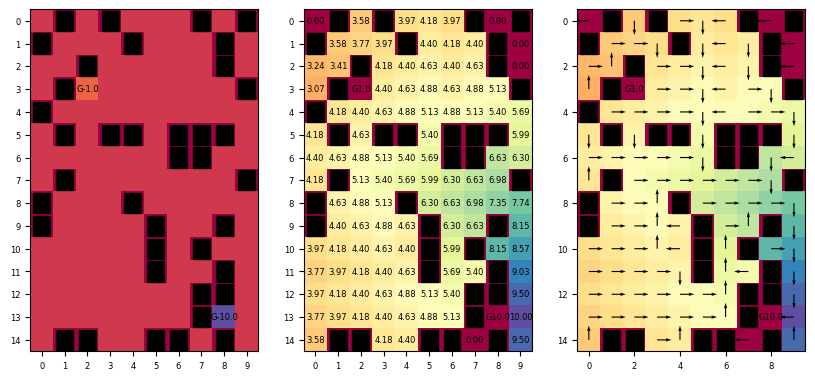

Yes, we converge w.r.t. our tolerance
Distance between V_24(S) and V_25(S) is: 0.0





In [20]:
# (1) Changing max_n_of_iterations: everything else, position of the Nblocks included, remains fixed


# Build the world (and initial values)
World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
Values = np.zeros((Ly,Lx))

iterations_for = 13

for n in range(1, iterations_for + 1):
    print("max_n_of_iterations = ", n*2)
    World, NewValues, Policy, result_info, num_iter = PY_GW_VI_tools.solve_grid_world(
        World = World,
        initial_values = Values,
        max_n_of_iterations = n*2,
        gamma = gamma,
        tolerance = tolerance,
        possible_actions = Actions,
        p = p,
        random_flag=random_flag)
    PY_GW_VI_plot.plot_world_values_policy(World=World, Values=NewValues, Policy=Policy)
    print(PY_GW_VI_tools.get_info_about_result(result_info = result_info))
    print("\n\n")

A curious thing happens in this case. Each goal-cell may be considered "as a source of heat": at each iteration the "effects of the warmth" reach a greater radius of influence. Before intersecting, it is as if in a specific state the agent knew nothing of the existence of the other sources and it will follow the path that leads it to the closer goal-cell (if the "warmth" coming from it at a certain iteration had already reached that position).

When the "warmth" coming from different goal-cells starts to intersect, so in a specific cell the agent will be aware of the existance of multiple goal-cells, the agent may decide to aim for a specific goal-cell rather than anotehr one.

But how does it decide which aim to pursue? See next paragraph!

#### (2) Changing gamma

gamma =  0.1


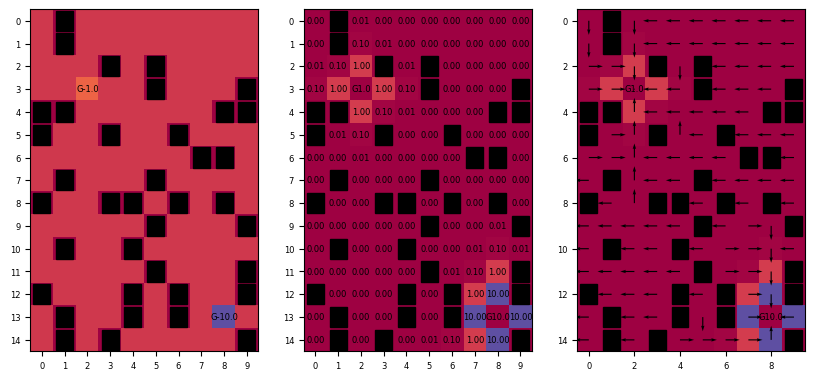

Yes, we converge w.r.t. our tolerance
Distance between V_4(S) and V_5(S) is: 0.0001651262143533445



gamma =  0.2


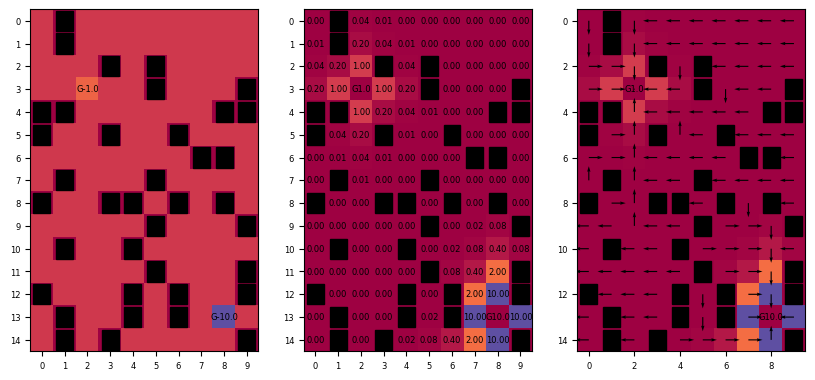

Yes, we converge w.r.t. our tolerance
Distance between V_5(S) and V_6(S) is: 0.0005284038859307025



gamma =  0.30000000000000004


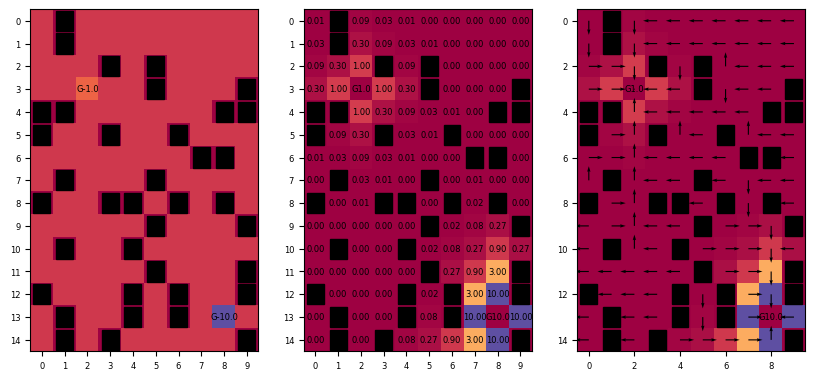

Yes, we converge w.r.t. our tolerance
Distance between V_6(S) and V_7(S) is: 0.0006214341960336594



gamma =  0.4


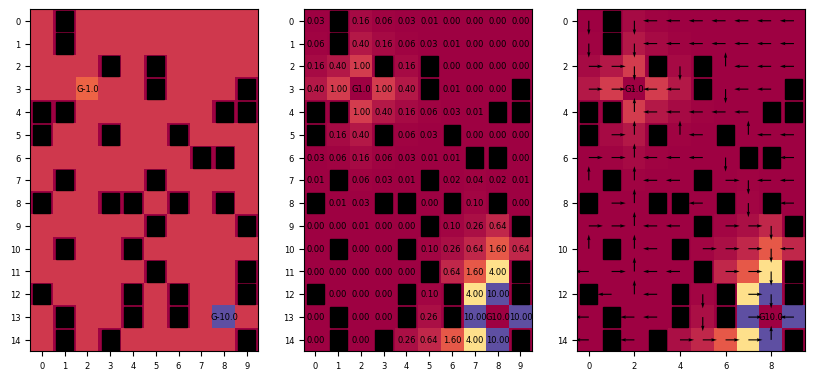

Yes, we converge w.r.t. our tolerance
Distance between V_8(S) and V_9(S) is: 0.0005911877567338488



gamma =  0.5


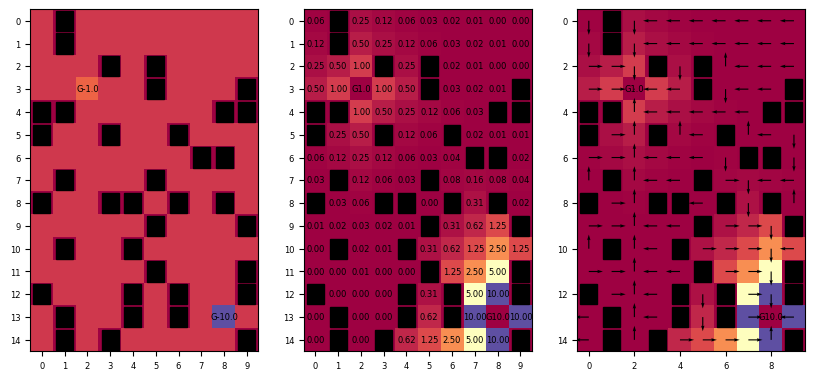

Yes, we converge w.r.t. our tolerance
Distance between V_10(S) and V_11(S) is: 0.0004915256793796061



gamma =  0.6000000000000001


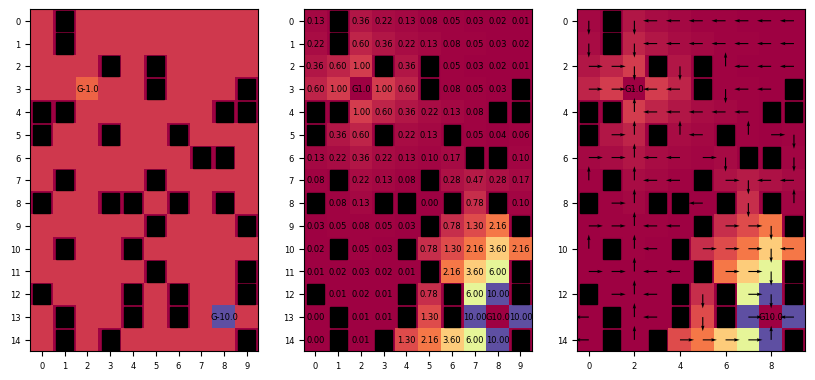

Yes, we converge w.r.t. our tolerance
Distance between V_11(S) and V_12(S) is: 0.0006765576891606104



gamma =  0.7000000000000001


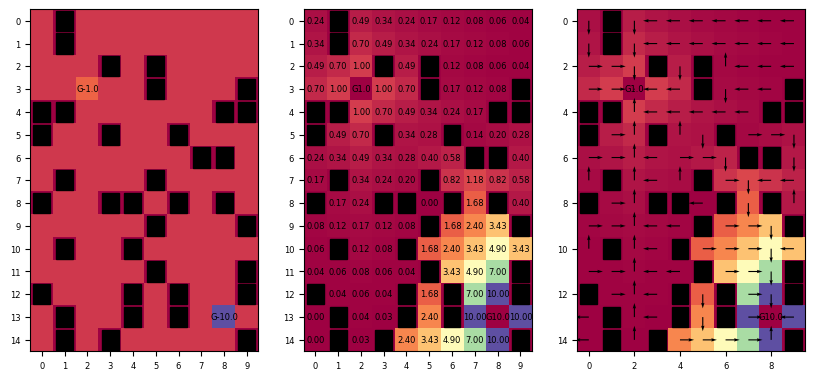

Yes, we converge w.r.t. our tolerance
Distance between V_13(S) and V_14(S) is: 0.0



gamma =  0.8


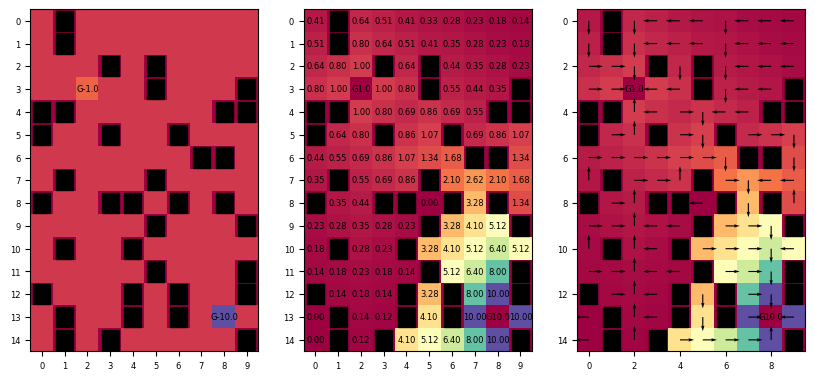

Yes, we converge w.r.t. our tolerance
Distance between V_20(S) and V_21(S) is: 0.000914288198254241



gamma =  0.9


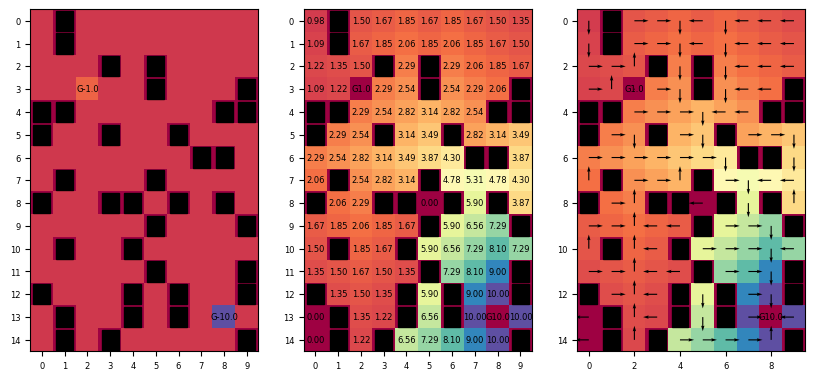

Yes, we converge w.r.t. our tolerance
Distance between V_23(S) and V_24(S) is: 0.0



gamma =  1.0


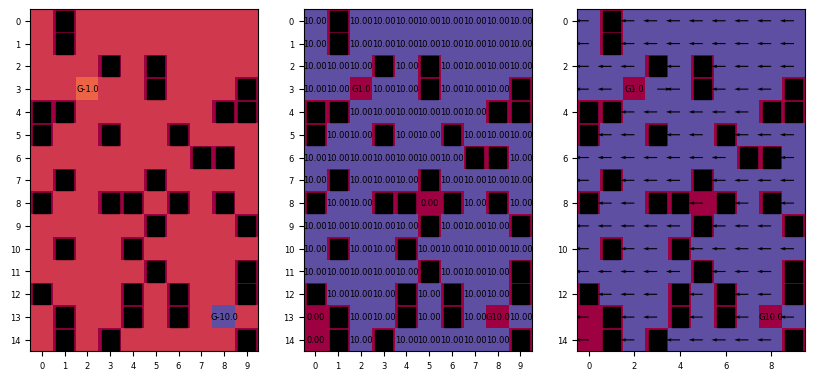

Yes, we converge w.r.t. our tolerance
Distance between V_23(S) and V_24(S) is: 0.0





In [21]:
# (2) Changing gamma: everything else, position of the Nblocks included, remains fixed


# Build the world (and initial values)
World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
Values = np.zeros((Ly,Lx))

iterations_for = 10
max_n_of_iterations = 300

for n in range(1, iterations_for + 1):
    print("gamma = ", 0.1*n)
    World, NewValues, Policy, result_info, num_iter = PY_GW_VI_tools.solve_grid_world(
        World = World,
        initial_values = Values,
        max_n_of_iterations = max_n_of_iterations,
        gamma = 0.1*n,
        tolerance = tolerance,
        possible_actions = Actions,
        p = p,
        random_flag=random_flag)
    PY_GW_VI_plot.plot_world_values_policy(World=World, Values=NewValues, Policy=Policy)
    print(PY_GW_VI_tools.get_info_about_result(result_info = result_info))
    print("\n\n")

We have already mentioned in the comments of the code that the higher the value of `gamma` (except for `gamma = 1`), the more forward-looking we are and take the future into account.

In the case of multi goals this concept has an impact on the choice of the goal-cell that the agent wants to reach. We observe that with low values of `gamma` the agent will be prone to go to the closest goal-cell while with high values of `gamma` the agent will seek for the goal-cell that will give it the highest reward.

However, consider that, reasonably, the agorithm behind this finds a compromise between the value of `gamma`, goal-cells proximity and associated rewards.

#### (3) An average time to fall below the tolerance

As already mentioned in the "Example 1" the generation of the gridworld is partially random since the amount `Nblock` is fixed but the positions of the walls is not. We will now investigate an average of the time to reach the convergence if `Lx` and `Ly` change (the time required to do the plots will not be considered). The value of `max_n_of_iterations` is important to set a stop condition to the algorithm: we assume that the value we chose is high enough and that the convergence happens before. However, this is not sure and one may play with the variable and the code to see how many times the convergences is reached and how many times it is not. A high value of `num_tests` helps to obtain a better estimation.

In [22]:
# (3) An average time to fall below the tolerance
# we use the function function_time(max_n_of_iterations, num_tests, Lx, Ly) that has already been defined

function_time(1000, 50, 10, 15)
print("\n")
function_time(1000, 50, 15, 15)
print("\n")
function_time(1000, 50, 20, 20)
print("\n")
function_time(1000, 50, 25, 25)
print("\n")

Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 0.07190009117126465 seconds
Standard deviation: 0.009660983024571287 seconds


Lx = 15; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 0.12367803573608399 seconds
Standard deviation: 0.016437433731331857 seconds


Lx = 20; Ly = 20
max_n_of_iterations = 1000; 50 tests
Average time: 0.285474157333374 seconds
Standard deviation: 0.04835242207899588 seconds


Lx = 25; Ly = 25
max_n_of_iterations = 1000; 50 tests
Average time: 0.5433198308944702 seconds
Standard deviation: 0.0291148634239289 seconds




#### (4) Number of iterations to converge

Let's study the average amount of iterations needed to get the convergence (so to fall below the requested tolerance). Similarly to the case before, we assume to have a value of `max_n_of_iterations` that is high enough and will not be reached:

In [23]:
# (4) Number of iterations to converge
# we use the function function_convergence(max_n_of_iterations, num_tests, Lx, Ly) that has already been defined

function_convergence(1000, 50, 10, 15)
print("\n")
function_convergence(1000, 50, 15, 15)
print("\n")
function_convergence(1000, 50, 20, 20)
print("\n")
function_convergence(1000, 50, 25, 25)
print("\n")

Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 22.28
Standard deviation: 3.949886074306448


Lx = 15; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 22.44
Standard deviation: 1.2026637102698328


Lx = 20; Ly = 20
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 24.86
Standard deviation: 0.4004996878900157


Lx = 25; Ly = 25
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 30.0
Standard deviation: 0.2




#### Tests - 3 goal-cells

Let's now play a little with the code. We will observe what happens changing the values of:
- `max_n_of_iterations` (1)
- `gamma` (2)

and we will investigate:
- an average time to fall below the tolerance (3)
- number of iterations to converge (4)

having 3 goal-cells.

So first of all let's set the parameters:

In [27]:
# width of the grid; height of the grid; amount of cells that are walls in the grid
Lx = 10
Ly = 15
Nblocks = 45

# cells that are goals; amount of the rewards if the goals are reached.
# Remark that here we have two goals, and the rewards_list is therefore composed by two values
goal = [(13,8),(3,2),(11, 1)]
rewards_list = [10,1,40]

# the algorithm will stop after a certain amount of iterations max_n_of_iterations if it hadn't reached the
# desidered tolerance yet ( dist_2(V_(k+1) - V_(k)) < tolerance )
max_n_of_iterations = 300
tolerance = 0.001

# gamma is the discount factor, which expresses how far in the future we want your sum to contribute.
# The more gamma is high, the more forward-looking we are and take the future into account
gamma = 0.95

# probability that I take the action that maximises the V (V is the value of the policy).
# A value that is less than 1 means that with a probability 1 - p we will pick a random action (however,
# in the set of the random actions there is also the one that maximises the V)
p = 1

# random_flag=False means that the choice of the action is deterministic.
# Redundancy with p = 1, but the boolean value is safer to be used with comparisons (floats may give problems)
random_flag=False

#### (1) Changing max_n_of_iterations

max_n_of_iterations =  2


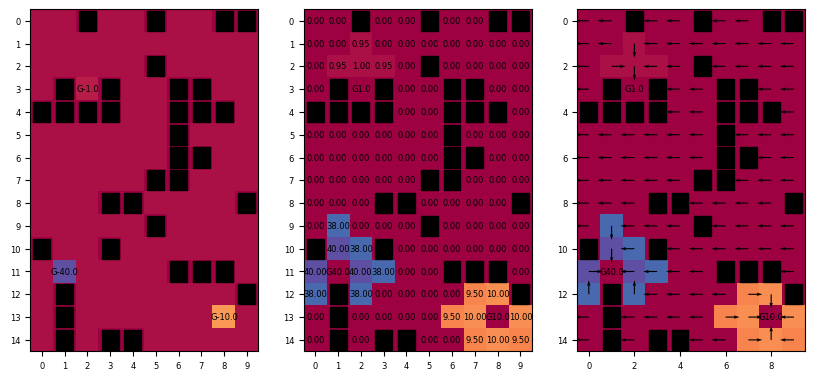

No, we stop before reaching the tolerance threshold
Distance between V_2(S) and V_3(S) is: 7.1104184124424075



max_n_of_iterations =  4


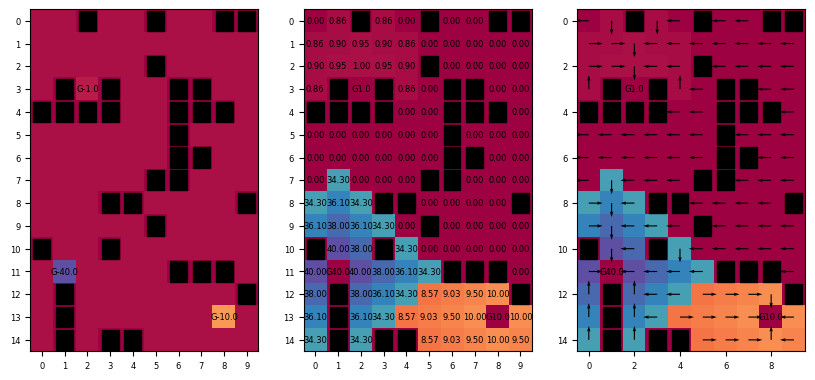

No, we stop before reaching the tolerance threshold
Distance between V_4(S) and V_5(S) is: 8.939205172918992



max_n_of_iterations =  6


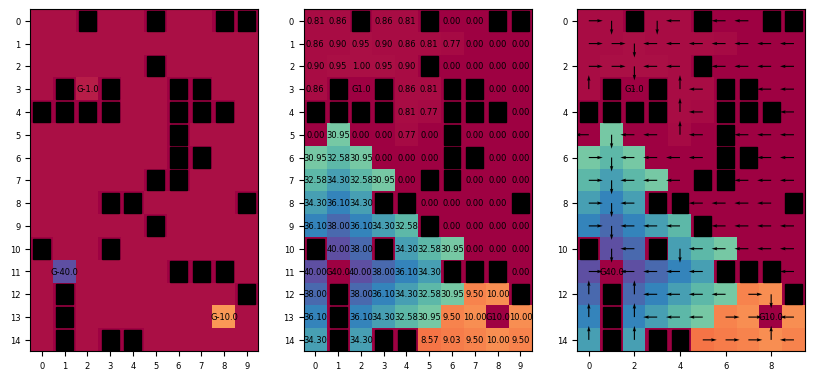

No, we stop before reaching the tolerance threshold
Distance between V_6(S) and V_7(S) is: 6.193120649310576



max_n_of_iterations =  8


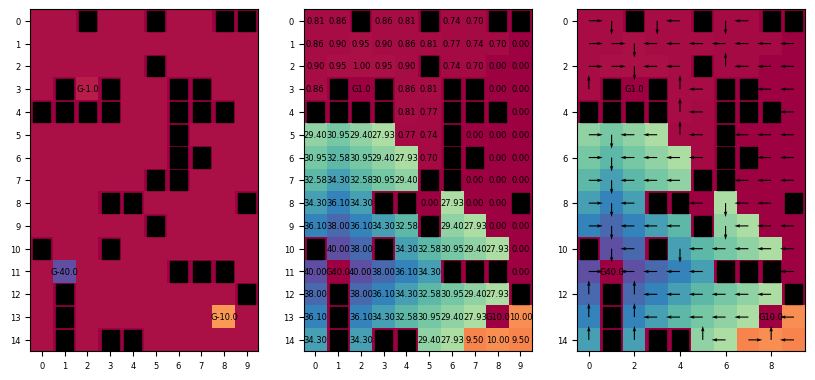

No, we stop before reaching the tolerance threshold
Distance between V_8(S) and V_9(S) is: 5.670419057363198



max_n_of_iterations =  10


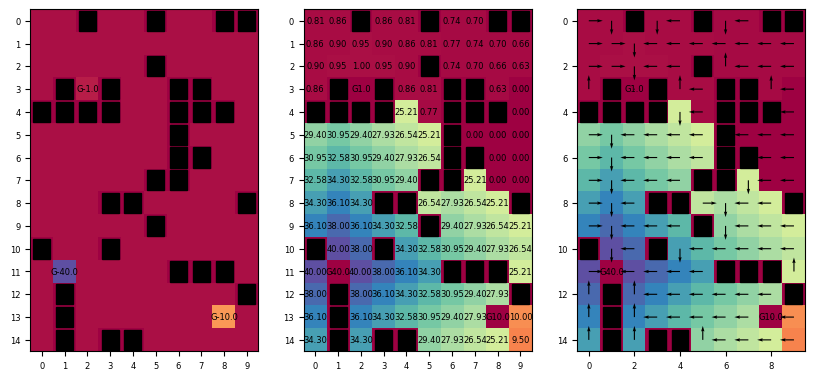

No, we stop before reaching the tolerance threshold
Distance between V_10(S) and V_11(S) is: 5.143583953517939



max_n_of_iterations =  12


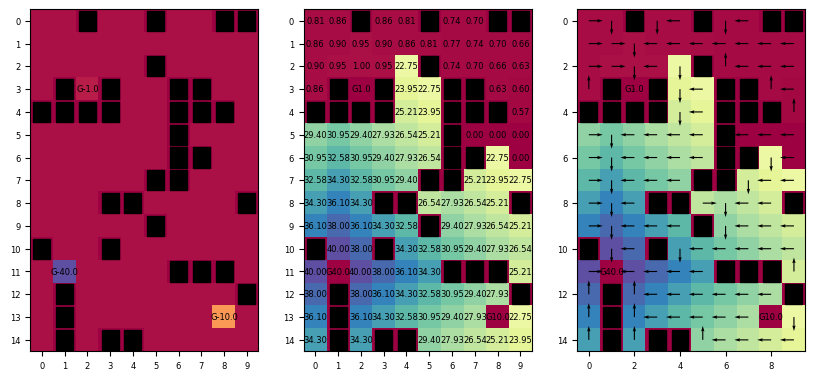

No, we stop before reaching the tolerance threshold
Distance between V_12(S) and V_13(S) is: 3.7920083343083757



max_n_of_iterations =  14


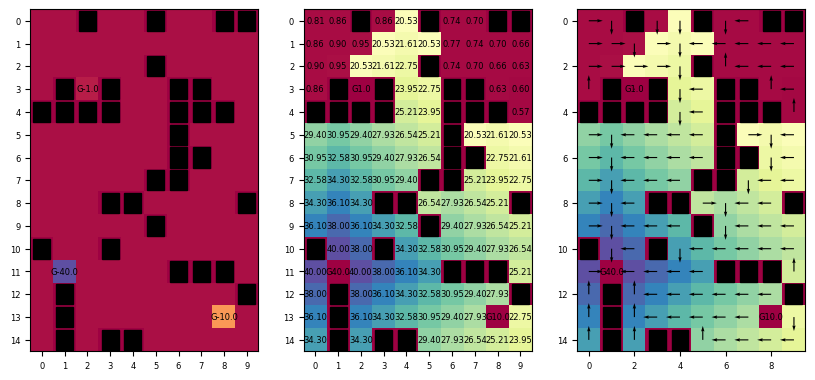

No, we stop before reaching the tolerance threshold
Distance between V_14(S) and V_15(S) is: 3.9715699317760023



max_n_of_iterations =  16


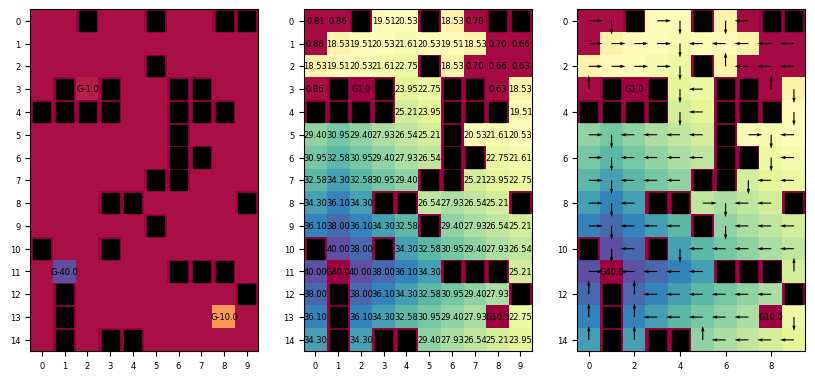

No, we stop before reaching the tolerance threshold
Distance between V_16(S) and V_17(S) is: 3.5527599625677238



max_n_of_iterations =  18


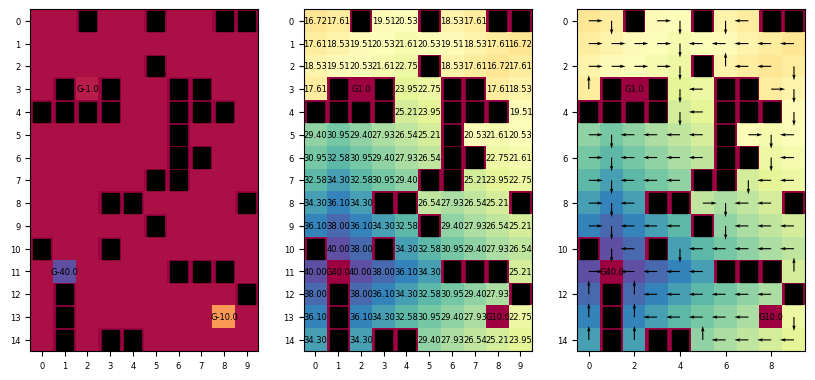

No, we stop before reaching the tolerance threshold
Distance between V_18(S) and V_19(S) is: 2.264324126739626



max_n_of_iterations =  20


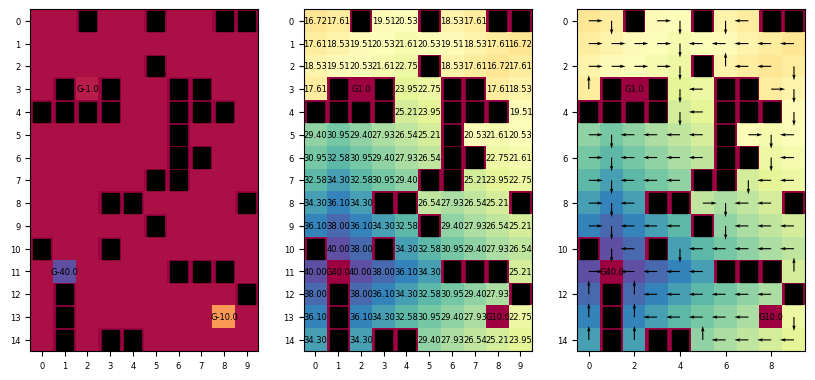

Yes, we converge w.r.t. our tolerance
Distance between V_18(S) and V_19(S) is: 0.0



max_n_of_iterations =  22


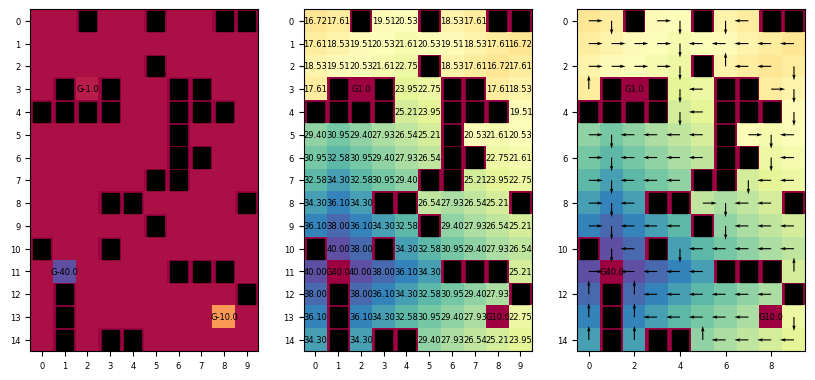

Yes, we converge w.r.t. our tolerance
Distance between V_18(S) and V_19(S) is: 0.0



max_n_of_iterations =  24


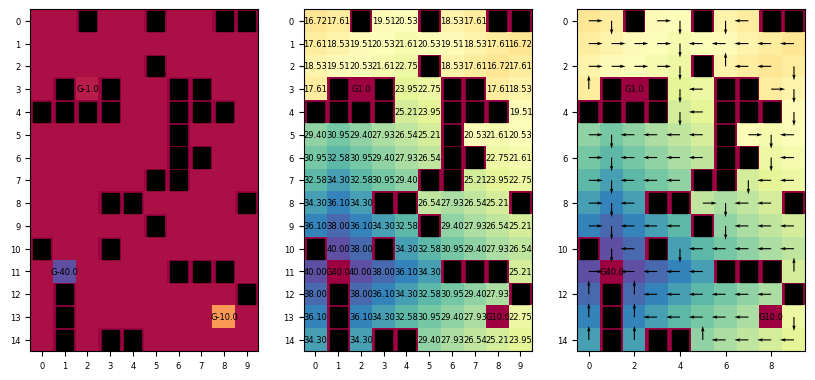

Yes, we converge w.r.t. our tolerance
Distance between V_18(S) and V_19(S) is: 0.0



max_n_of_iterations =  26


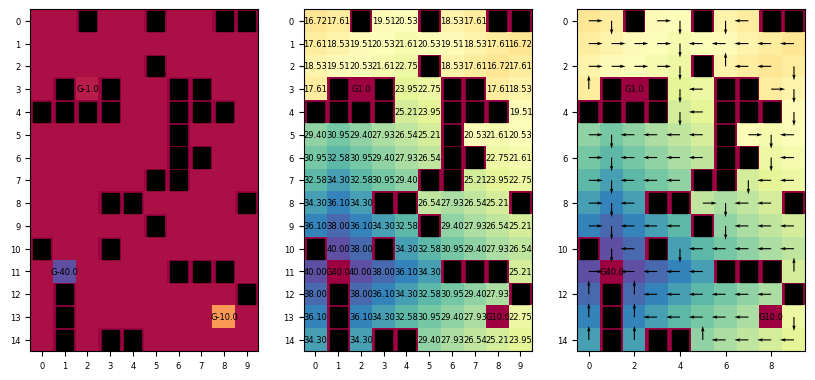

Yes, we converge w.r.t. our tolerance
Distance between V_18(S) and V_19(S) is: 0.0





In [29]:
# (1) Changing max_n_of_iterations: everything else, position of the Nblocks included, remains fixed


# Build the world (and initial values)
World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
Values = np.zeros((Ly,Lx))

iterations_for = 13

for n in range(1, iterations_for + 1):
    print("max_n_of_iterations = ", n*2)
    World, NewValues, Policy, result_info, num_iter = PY_GW_VI_tools.solve_grid_world(
        World = World,
        initial_values = Values,
        max_n_of_iterations = n*2,
        gamma = gamma,
        tolerance = tolerance,
        possible_actions = Actions,
        p = p,
        random_flag=random_flag)
    PY_GW_VI_plot.plot_world_values_policy(World=World, Values=NewValues, Policy=Policy)
    print(PY_GW_VI_tools.get_info_about_result(result_info = result_info))
    print("\n\n")

A similar situation of the case with two goal-cells happens: here we have `gamma = 0.95` and the more iterations are allowed, the more the highest offered reward is attractive.

#### (2) Changing gamma

gamma =  0.1


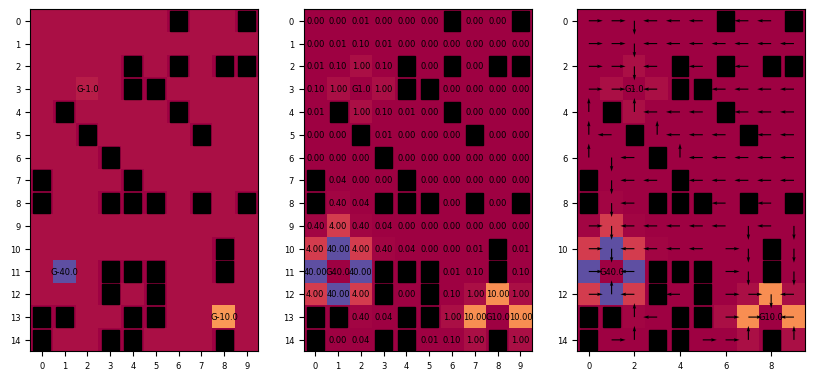

Yes, we converge w.r.t. our tolerance
Distance between V_4(S) and V_5(S) is: 0.0007441773982055624



gamma =  0.2


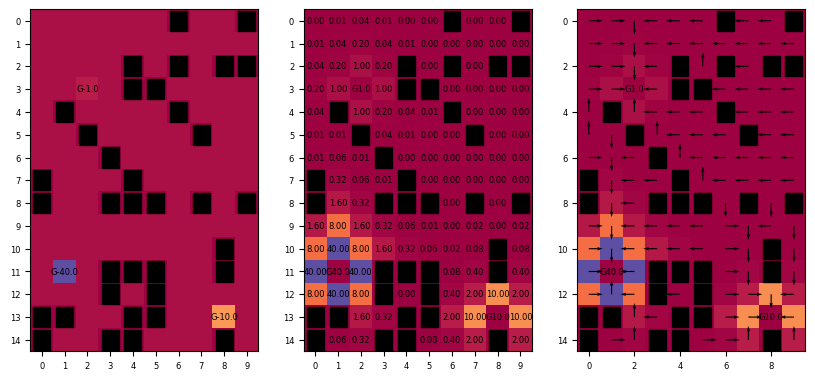

Yes, we converge w.r.t. our tolerance
Distance between V_6(S) and V_7(S) is: 7.445302769755799e-05



gamma =  0.30000000000000004


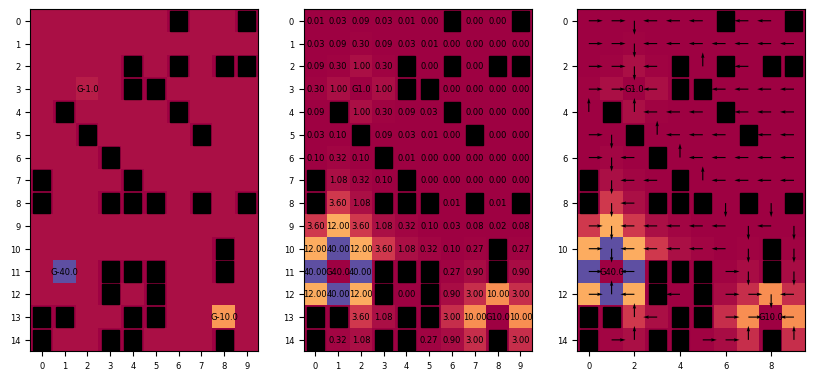

Yes, we converge w.r.t. our tolerance
Distance between V_6(S) and V_7(S) is: 0.0009527774241657923



gamma =  0.4


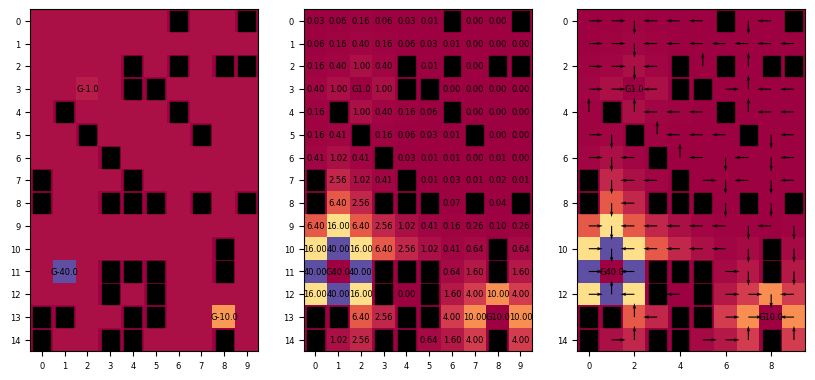

Yes, we converge w.r.t. our tolerance
Distance between V_9(S) and V_10(S) is: 0.0006392812016413855



gamma =  0.5


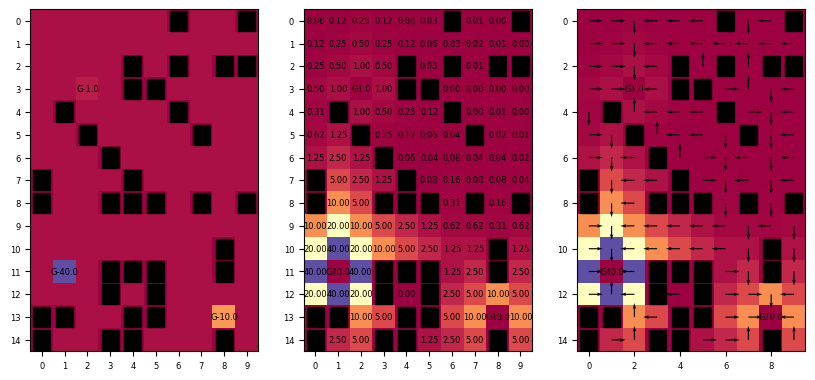

Yes, we converge w.r.t. our tolerance
Distance between V_11(S) and V_12(S) is: 0.0005228638803453454



gamma =  0.6000000000000001


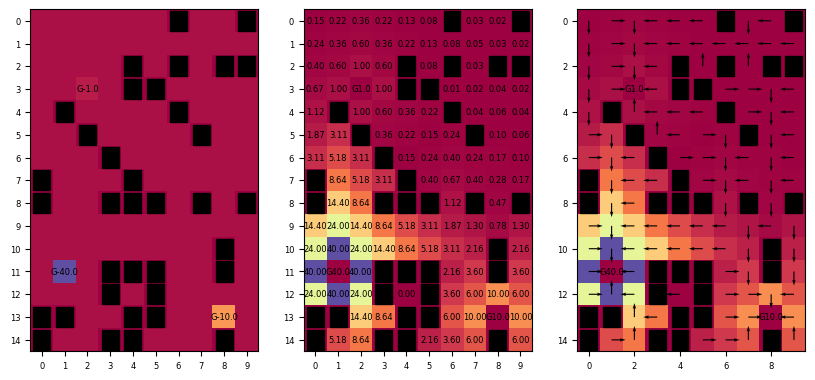

Yes, we converge w.r.t. our tolerance
Distance between V_13(S) and V_14(S) is: 0.0002435607680978199



gamma =  0.7000000000000001


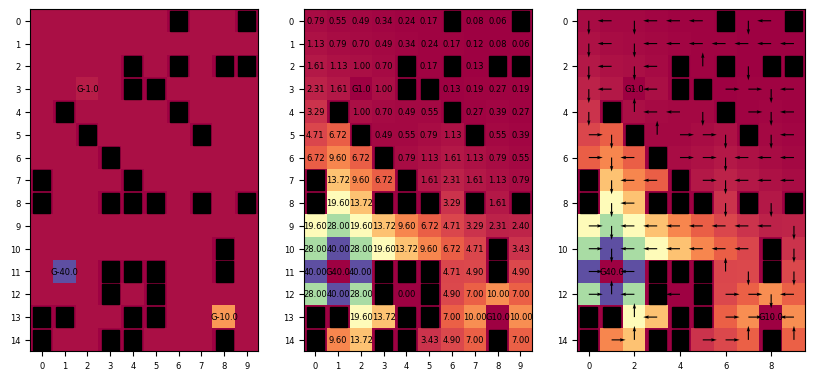

Yes, we converge w.r.t. our tolerance
Distance between V_17(S) and V_18(S) is: 0.0



gamma =  0.8


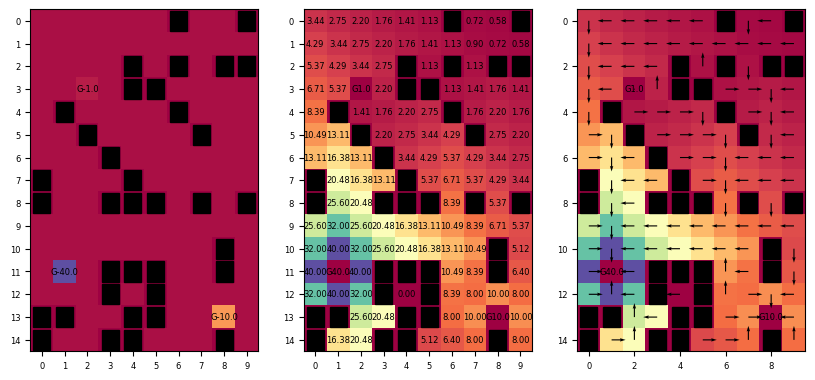

Yes, we converge w.r.t. our tolerance
Distance between V_20(S) and V_21(S) is: 0.0



gamma =  0.9


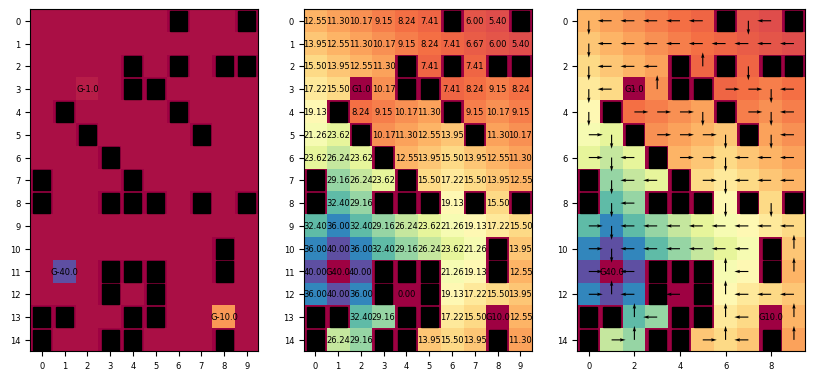

Yes, we converge w.r.t. our tolerance
Distance between V_20(S) and V_21(S) is: 0.0



gamma =  1.0


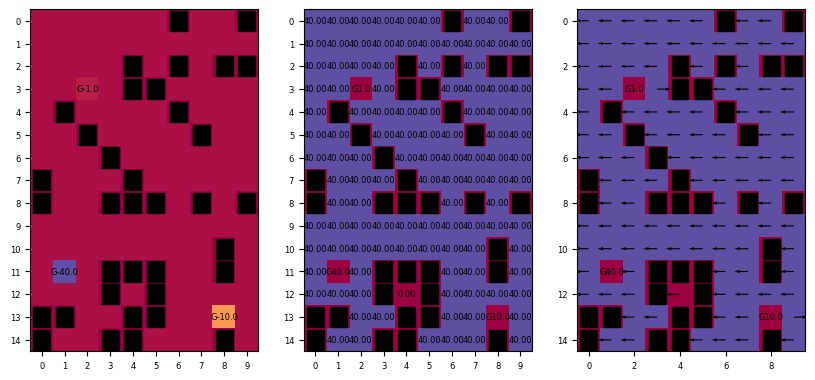

Yes, we converge w.r.t. our tolerance
Distance between V_20(S) and V_21(S) is: 0.0





In [30]:
# (2) Changing gamma: everything else, position of the Nblocks included, remains fixed


# Build the world (and initial values)
World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
Values = np.zeros((Ly,Lx))

iterations_for = 10
max_n_of_iterations = 300

for n in range(1, iterations_for + 1):
    print("gamma = ", 0.1*n)
    World, NewValues, Policy, result_info, num_iter = PY_GW_VI_tools.solve_grid_world(
        World = World,
        initial_values = Values,
        max_n_of_iterations = max_n_of_iterations,
        gamma = 0.1*n,
        tolerance = tolerance,
        possible_actions = Actions,
        p = p,
        random_flag=random_flag)
    PY_GW_VI_plot.plot_world_values_policy(World=World, Values=NewValues, Policy=Policy)
    print(PY_GW_VI_tools.get_info_about_result(result_info = result_info))
    print("\n\n")

The same observations made for the case with two goal-cells hold.

#### (3) An average time to fall below the tolerance

Let's observe also in this case the average time required to fall below the needed tolerance (assuming the same hypotheses of the case of two goal-cells):

In [31]:
# (3) An average time to fall below the tolerance
# we use the function function_time(max_n_of_iterations, num_tests, Lx, Ly) that has already been defined

function_time(1000, 50, 10, 15)
print("\n")
function_time(1000, 50, 15, 15)
print("\n")
function_time(1000, 50, 20, 20)
print("\n")
function_time(1000, 50, 25, 25)
print("\n")

Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 0.06579968452453613 seconds
Standard deviation: 0.01025361154244435 seconds


Lx = 15; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 0.1314537239074707 seconds
Standard deviation: 0.009615115700667533 seconds


Lx = 20; Ly = 20
max_n_of_iterations = 1000; 50 tests
Average time: 0.35002062320709226 seconds
Standard deviation: 0.04187858737687093 seconds


Lx = 25; Ly = 25
max_n_of_iterations = 1000; 50 tests
Average time: 0.8166416072845459 seconds
Standard deviation: 0.22983158943006757 seconds




#### (4) Number of iterations to converge

Also here we assume to have a value of `max_n_of_iterations` that is high enough and will not be reached:

In [32]:
# (4) Number of iterations to converge
# we use the function function_convergence(max_n_of_iterations, num_tests, Lx, Ly) that has already been defined

function_convergence(1000, 50, 10, 15)
print("\n")
function_convergence(1000, 50, 15, 15)
print("\n")
function_convergence(1000, 50, 20, 20)
print("\n")
function_convergence(1000, 50, 25, 25)
print("\n")

Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 20.84
Standard deviation: 2.579612373981796




## Example 3: Solving gridworld with some random actions

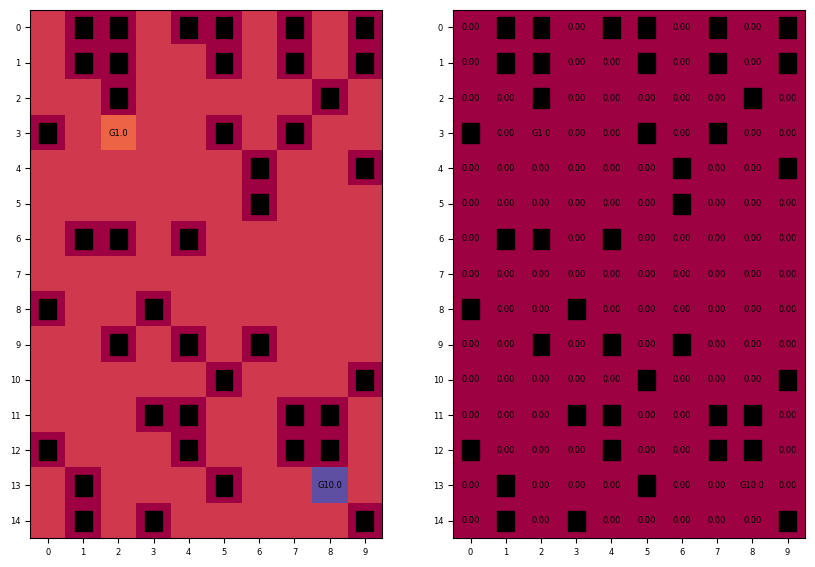

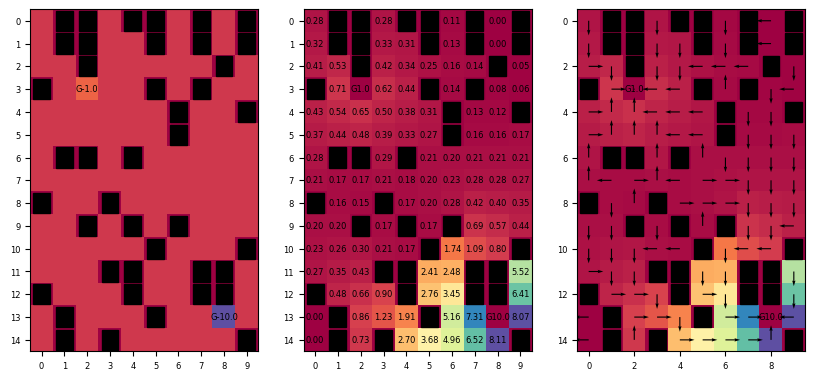

Yes, we converge w.r.t. our tolerance
Distance between V_68(S) and V_69(S) is: 0.0009674911725341284


In [ ]:
# Parameters
Lx = 10
Ly = 15
Nblocks = 45
goal = [(13,8),(3,2)]
rewards_list = [10,1]
max_n_of_iterations = 100
gamma = 0.95
tolerance = 0.001
p = 0.1
random_flag=True

# Build the world (and initial values)
World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
Values = np.zeros((Ly,Lx))

# Solve and plot
PY_GW_VI_plot.plot_world_values(World=World, Values=Values)
World, NewValues, Policy, result_info = PY_GW_VI_tools.solve_grid_world(
    World = World, initial_values = Values, max_n_of_iterations = max_n_of_iterations, gamma = gamma, tolerance = tolerance, possible_actions = Actions, p = p, random_flag=random_flag)
PY_GW_VI_plot.plot_world_values_policy(World=World, Values=NewValues, Policy=Policy)
print( PY_GW_VI_tools.get_info_about_result(result_info = result_info) )

Introducing the random component appears to not affect the fact we will take the optimum choice. \
But the fact sometimes it choices to go to the smaller reward and end there, altough he can see far forward (gamma is 0.95). It is interesting. \
Gaia you can think about it🙂🙂🙂🙂🙂